# Predict Students' Dropout and Academic Success

## Descripción del caso y objetivos

El conjunto de datos Predict Students’ Dropout and Academic Success fue desarrollado por investigadores del Instituto Politécnico de Portalegre (Portugal) en el marco de un proyecto orientado a reducir el abandono y el fracaso académico en la educación superior. Su finalidad es aplicar técnicas de aprendizaje automático para identificar de forma temprana a los estudiantes con riesgo de deserción, permitiendo a las instituciones diseñar estrategias de apoyo y retención más efectivas.

El dataset recopila información conocida al momento de la matrícula del estudiante, abarcando tres dimensiones principales:

- Trayectoria académica previa, como notas de ingreso, tipo de escuela secundaria o historial educativo.
- Datos demográficos, como edad, género y estado civil.
- Factores socioeconómicos, como becas, situación laboral o nivel educativo de los padres.

Además, incluye variables que reflejan el rendimiento académico al finalizar el primer y segundo semestre, lo que permite analizar la evolución del desempeño y su relación con el riesgo de abandono o éxito académico.

El problema se plantea como una tarea de clasificación multiclase, en la que el objetivo es predecir el estado final del estudiante al término de la duración normal del programa:

- Dropout (abandono)
- Enrolled (matriculado/activo)
- Graduate (graduado)

Por lo que nuestra pregunta de investigación seria:
¿Qué relación existe entre la trayectoria académica, los datos demográficos, los factores socioeconómicos y el rendimiento académico de los primeros semestres, con la probabilidad de que un estudiante universitario abandone, continúe o se gradúe, según un modelo predictivo basado en aprendizaje automático?

El dataset contiene *36 features y 1 target* por lo que se describira que significado tiene cada uno:

1. Marital status: Estado civil del estudiante (1 = soltero, 2 = casado, 3 = viudo, 4 = divorciado, 5 = unión de hecho, 6 = separado legalmente).
2. Application mode: Modalidad o vía de ingreso (general, transferencia, titulado, internacional, etc.).
3. Application order: Orden de preferencia de la carrera (0 = primera opción, 9 = última).
4. Course: Carrera o programa matriculado (agronomía, enfermería, informática, etc.).
5. Daytime/evening attendance: Modalidad de estudios (1 = diurna, 0 = nocturna).
6. Previous qualification: Nivel educativo alcanzado antes del ingreso (secundaria, licenciatura, máster, etc.).
7. Previous qualification (grade): Calificación de la formación previa (0–200).
8. Nationality: Nacionalidad del estudiante (portugués, español, brasileño, etc.).
9. Mother’s qualification: Nivel educativo de la madre.
10. Father’s qualification: Nivel educativo del padre.
11. Mother’s occupation: Ocupación principal de la madre (clasificación profesional).
12. Father’s occupation: Ocupación principal del padre (clasificación profesional).
13. Admission grade: Calificación de admisión (0–200).
14. Displaced: Indica si el estudiante vive fuera de su domicilio familiar (1 = sí, 0 = no).
15. Educational special needs: Indica si presenta necesidades educativas especiales (1 = sí, 0 = no).
16. Debtor: Indica si el estudiante tiene deudas con la institución (1 = sí, 0 = no).
17. Tuition fees up to date: Indica si el pago de matrícula está al día (1 = sí, 0 = no).
18. Gender: Género del estudiante (1 = masculino, 0 = femenino).
19. Scholarship holder: Indica si el estudiante recibe beca (1 = sí, 0 = no).
20. Age at enrollment: Edad del estudiante al momento de la matrícula.
21. International: Indica si el estudiante es extranjero (1 = sí, 0 = no).
22. Curricular units 1st sem (credited): Asignaturas convalidadas en el primer semestre.
23. Curricular units 1st sem (enrolled): Asignaturas matriculadas en el primer semestre.
24. Curricular units 1st sem (evaluations): Número de evaluaciones realizadas en el primer semestre.
25. Curricular units 1st sem (approved): Asignaturas aprobadas en el primer semestre.
26. Curricular units 1st sem (grade): Promedio de notas en el primer semestre (0–20).
27. Curricular units 1st sem (without evaluations): Asignaturas sin evaluación en el primer semestre.
28. Curricular units 2nd sem (credited): Asignaturas convalidadas en el segundo semestre.
29. Curricular units 2nd sem (enrolled): Asignaturas matriculadas en el segundo semestre.
30. Curricular units 2nd sem (evaluations): Número de evaluaciones realizadas en el segundo semestre.
31. Curricular units 2nd sem (approved): Asignaturas aprobadas en el segundo semestre.
32. Curricular units 2nd sem (grade): Promedio de notas en el segundo semestre (0–20).
33. Curricular units 2nd sem (without evaluations): Asignaturas sin evaluación en el segundo semestre.
34. Unemployment rate: Tasa de desempleo nacional (%) en el momento de la matrícula.
35. Inflation rate: Tasa de inflación nacional (%) en el momento de la matrícula.
36. GDP: Producto Interno Bruto (PIB) nacional en el momento de la matrícula.


---

###  1. Instalación e Importación de Librerías

'ucimlrepo' es una librería que permite acceder fácilmente a datasets del repositorio UCI Machine Learning Repository.

In [1]:
#pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, f_oneway
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
import statsmodels.api as sm
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)
pd.set_option('display.max_columns', None)
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.models import Model


---

###  2. Carga del Dataset desde UCI

Usamos el ID 697, correspondiente al dataset "Predict Students Dropout and Academic Success". Este conjunto contiene información académica, demográfica y económica de estudiantes universitarios, con el objetivo de predecir su estado final:Dropout, Enrolled o Graduate.

In [2]:
# fetch dataset
predict_students = fetch_ucirepo(id=697)

---

###  3. Conversión a DataFrame de pandas

 La función fetch_ucirepo devuelve un objeto con varias secciones:
- data.features → variables independientes (X)
- data.targets → variable objetivo (Y)

Convertimos ambas partes a DataFrames para trabajar fácilmente en pandas.

In [3]:
X = pd.DataFrame(predict_students.data.features)  # Variables explicativas
y = pd.DataFrame(predict_students.data.targets)   # Variable objetivo

# Combinamos ambas en un solo DataFrame para facilitar el análisis.
predict_students = pd.concat([X, y], axis=1)

---

###  4. Exploración inicial de la estructura de datos

shape → número de filas y columnas (muestra la magnitud del dataset)
head() → primeras filas, útil para entender la estructura general
Revisamos también la variable objetivo (y) para confirmar su formato.


In [4]:
print(X.shape)      # Esperado: (4424, 36) → 4424 registros, 36 variables
print(X.head())     # Primeras filas de las variables predictoras
print(y.head())     # Primeras filas de la variable objetivo

(4424, 36)
   Marital Status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                          

- El dataset contiene 4,424 observaciones de estudiantes y 36 variables predictoras.
- La variable 'Target' tiene tres categorías principales: Dropout, Enrolled, Graduate.
-  Se observan columnas con nombres descriptivos como:
- 'Admission grade', 'Scholarship holder', 'Curricular units 1st sem (grade)', etc.
- Estos datos combinan factores personales, académicos y socioeconómicos,
- ideales para un modelo predictivo de deserción universitaria.

---

###  5. Renombrar Columnas

El dataset original viene con nombres de variables en inglés.
Renombrar las columnas a español tiene dos ventajas:

- Facilita la interpretación durante el análisis exploratorio.
- Hace más clara la presentación del proyecto para lectores no técnicos.
- El diccionario 'nombres_columnas' mapea los nombres originales (clave) a nombres en español (valor). Luego usamos .rename() con inplace=True para aplicar el cambio directamente al DataFrame.

In [5]:
nombres_columnas = {
    "Marital Status": "Estado_civil",
    "Application mode": "Modo_ingreso",
    "Application order": "Orden_postulación",
    "Course": "Carrera",
    "Daytime/evening attendance": "Turno_estudio",
    "Previous qualification": "Formación_previa",
    "Previous qualification (grade)": "Nota_formación_previa",
    "Nacionality": "Nacionalidad",
    "Mother's qualification": "Formación_madre",
    "Father's qualification": "Formación_padre",
    "Mother's occupation": "Ocupación_madre",
    "Father's occupation": "Ocupación_padre",
    "Admission grade": "Nota_admisión",
    "Displaced": "Desplazado",
    "Educational special needs": "Necesidades_especiales",
    "Debtor": "Deudor",
    "Tuition fees up to date": "Pagos_al_día",
    "Gender": "Género",
    "Scholarship holder": "Becado",
    "Age at enrollment": "Edad_matrícula",
    "International": "Estudiante_internacional",
    "Curricular units 1st sem (credited)": "Creditos_1S",
    "Curricular units 1st sem (enrolled)": "Matriculadas_1S",
    "Curricular units 1st sem (evaluations)": "Evaluaciones_1S",
    "Curricular units 1st sem (approved)": "Aprobadas_1S",
    "Curricular units 1st sem (grade)": "Nota_promedio_1S",
    "Curricular units 1st sem (without evaluations)": "Sin_evaluar_1S",
    "Curricular units 2nd sem (credited)": "Creditos_2S",
    "Curricular units 2nd sem (enrolled)": "Matriculadas_2S",
    "Curricular units 2nd sem (evaluations)": "Evaluaciones_2S",
    "Curricular units 2nd sem (approved)": "Aprobadas_2S",
    "Curricular units 2nd sem (grade)": "Nota_promedio_2S",
    "Curricular units 2nd sem (without evaluations)": "Sin_evaluar_2S",
    "Unemployment rate": "Tasa_desempleo",
    "Inflation rate": "Tasa_inflación",
    "GDP": "PIB",
    "Target": "Resultado"
}

# Aplicamos el renombrado
predict_students.rename(columns=nombres_columnas, inplace=True)

---

###  6. Verificación del cambio de nombres

Usamos .head() para visualizar las primeras filas y confirmar que los nombres ya están en español.

In [6]:
# Verificar
predict_students.head()

,Estado_civil,Modo_ingreso,Orden_postulación,Carrera,Turno_estudio,Formación_previa,Nota_formación_previa,Nacionalidad,Formación_madre,Formación_padre,Ocupación_madre,Ocupación_padre,Nota_admisión,Desplazado,Necesidades_especiales,Deudor,Pagos_al_día,Género,Becado,Edad_matrícula,Estudiante_internacional,Creditos_1S,Matriculadas_1S,Evaluaciones_1S,Aprobadas_1S,Nota_promedio_1S,Sin_evaluar_1S,Creditos_2S,Matriculadas_2S,Evaluaciones_2S,Aprobadas_2S,Nota_promedio_2S,Sin_evaluar_2S,Tasa_desempleo,Tasa_inflación,PIB,Resultado
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


###  7. Preparación de los datos

Antes de analizar o modelar, debemos asegurarnos de que los datos estén completos y coherentes. Según la documentación oficial del dataset UCI, no existen valores faltantes, pero es buena práctica confirmarlo usando .info().

In [7]:
predict_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Estado_civil              4424 non-null   int64  
 1   Modo_ingreso              4424 non-null   int64  
 2   Orden_postulación         4424 non-null   int64  
 3   Carrera                   4424 non-null   int64  
 4   Turno_estudio             4424 non-null   int64  
 5   Formación_previa          4424 non-null   int64  
 6   Nota_formación_previa     4424 non-null   float64
 7   Nacionalidad              4424 non-null   int64  
 8   Formación_madre           4424 non-null   int64  
 9   Formación_padre           4424 non-null   int64  
 10  Ocupación_madre           4424 non-null   int64  
 11  Ocupación_padre           4424 non-null   int64  
 12  Nota_admisión             4424 non-null   float64
 13  Desplazado                4424 non-null   int64  
 14  Necesida

Interpretación del resultado:

- No hay valores nulos (Non-Null Count = 4424 en todas las columnas).
- 37 columnas en total (36 predictoras + 1 objetivo).
- La mayoría de las variables son numéricas enteras o flotantes (int64, float64).
- Solo una variable, Resultado, es de tipo object, ya que representa categorías (“Dropout”, “Enrolled”, “Graduate”).

###  8. Clasificación de variables por tipo

Para los análisis exploratorios y visualizaciones, separamos las variables categóricas y cuantitativas. Esto permitirá generar gráficos adecuados (barras para categóricas, histogramas para numéricas).

In [8]:
variables = {
    "categoricas": [
        "Estado_civil",
        "Modo_ingreso",
        "Orden_postulación",
        "Carrera",
        "Turno_estudio",
        "Formación_previa",
        "Nacionalidad",
        "Formación_madre",
        "Formación_padre",
        "Ocupación_madre",
        "Ocupación_padre",
        "Desplazado",
        "Necesidades_especiales",
        "Deudor",
        "Pagos_al_día",
        "Género",
        "Becado",
        "Estudiante_internacional"
    ],
    "cuantitativas": [
        "Nota_formación_previa",
        "Nota_admisión",
        "Edad_matrícula",
        "Creditos_1S",
        "Matriculadas_1S",
        "Evaluaciones_1S",
        "Aprobadas_1S",
        "Nota_promedio_1S",
        "Sin_evaluar_1S",
        "Creditos_2S",
        "Matriculadas_2S",
        "Evaluaciones_2S",
        "Aprobadas_2S",
        "Nota_promedio_2S",
        "Sin_evaluar_2S",
        "Tasa_desempleo",
        "Tasa_inflación",
        "PIB"
    ]
}


In [9]:
# Verificamos estadísticas generales
predict_students.describe()

,Estado_civil,Modo_ingreso,Orden_postulación,Carrera,Turno_estudio,Formación_previa,Nota_formación_previa,Nacionalidad,Formación_madre,Formación_padre,Ocupación_madre,Ocupación_padre,Nota_admisión,Desplazado,Necesidades_especiales,Deudor,Pagos_al_día,Género,Becado,Edad_matrícula,Estudiante_internacional,Creditos_1S,Matriculadas_1S,Evaluaciones_1S,Aprobadas_1S,Nota_promedio_1S,Sin_evaluar_1S,Creditos_2S,Matriculadas_2S,Evaluaciones_2S,Aprobadas_2S,Nota_promedio_2S,Sin_evaluar_2S,Tasa_desempleo,Tasa_inflación,PIB
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Interpretación de .describe():
- Distribución general: los valores parecen consistentes con datos académicos.

Variables fuera de lo habitual:
- Tasa_desempleo mínima 7.6% y máxima 16.2% → rango razonable.
- Nota_formación_previa y Nota_admisión entre 95 y 190 → posibles escalas en centésimas.
- Edad_matrícula de 17 a 70 → casos extremos de edad (podrían ser atípicos).
- Evaluaciones_2S llega hasta 45 → podría indicar repitencias o registros agregados.
- Sin valores faltantes, pero sí posibles outliers o valores extremos.

El dataset está completo y limpio, sin valores nulos, pero se identifican valores fuera de rango lógico (por ejemplo, inflación negativa o edad muy alta).

---

###  9. Análisis Exploratorio de Datos (EDA)

En esta sección se analizan las distribuciones y valores atípicos (outliers) de todas las variables del dataset.
Para cada variable:
- Si es cuantitativa: se grafican un boxplot y un histograma.
- Si es categórica: se grafican las frecuencias con porcentajes.

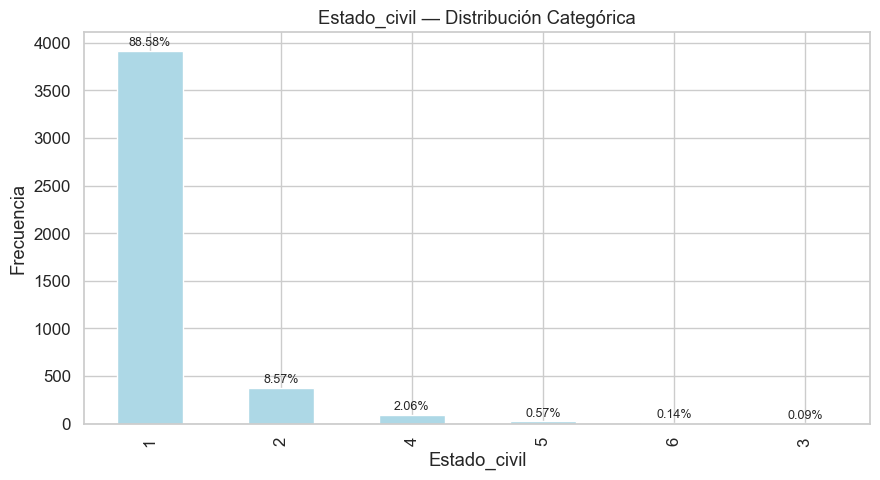

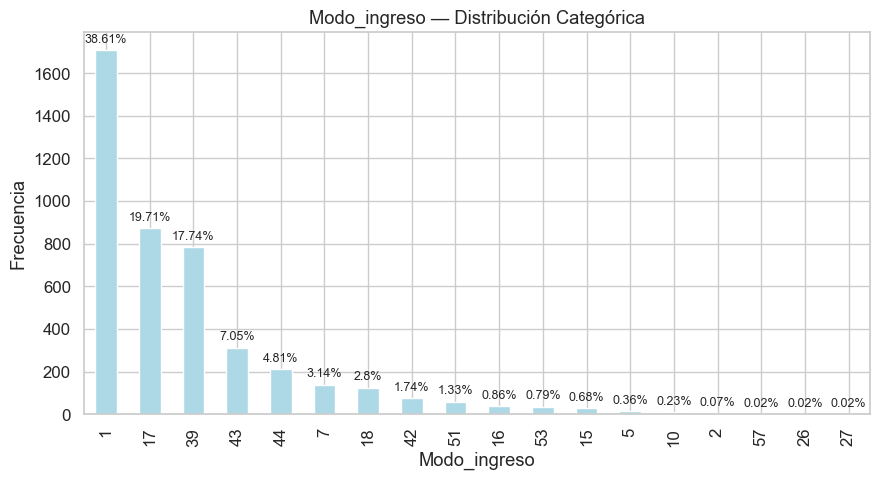

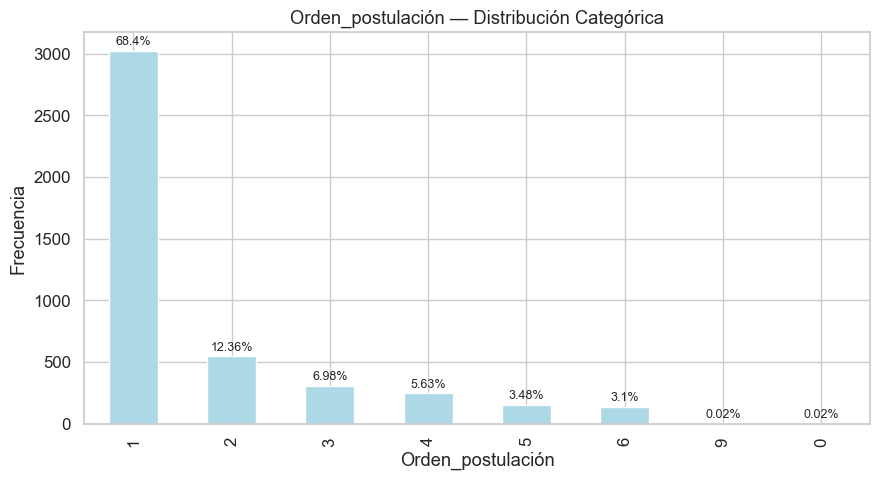

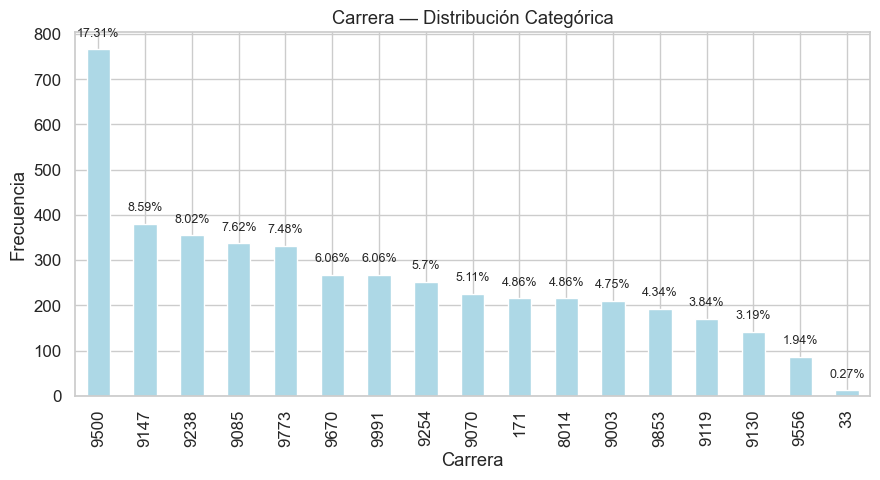

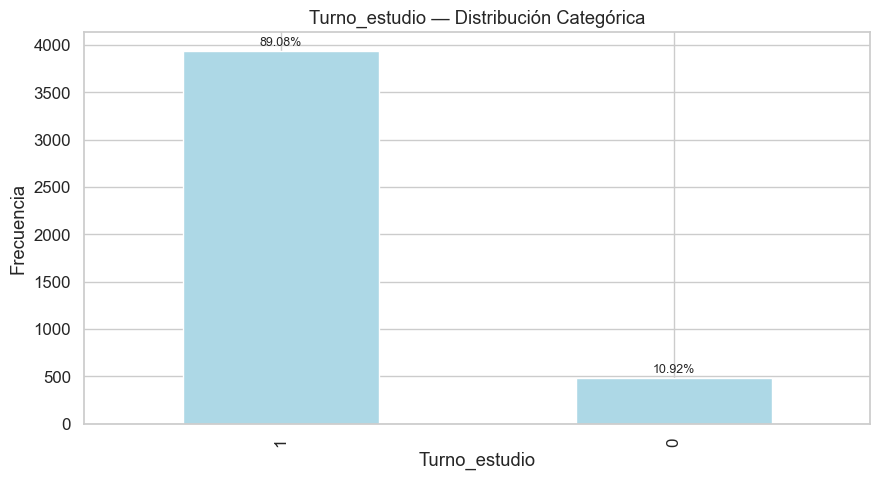

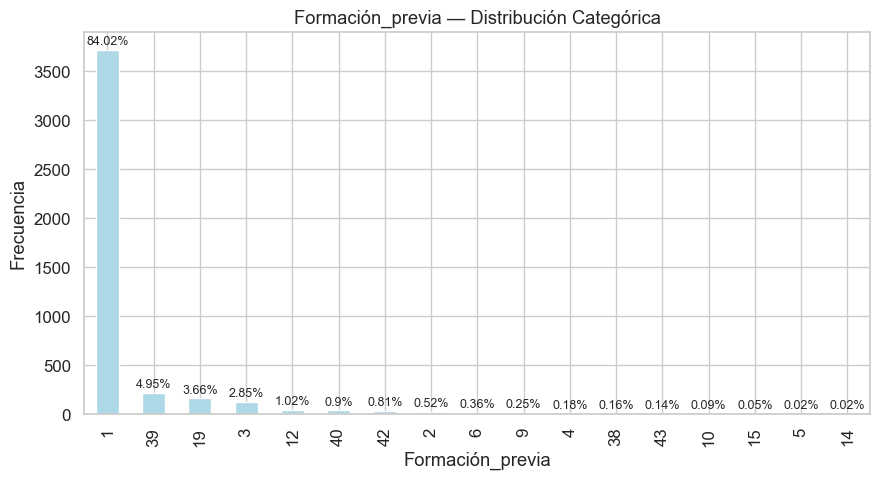

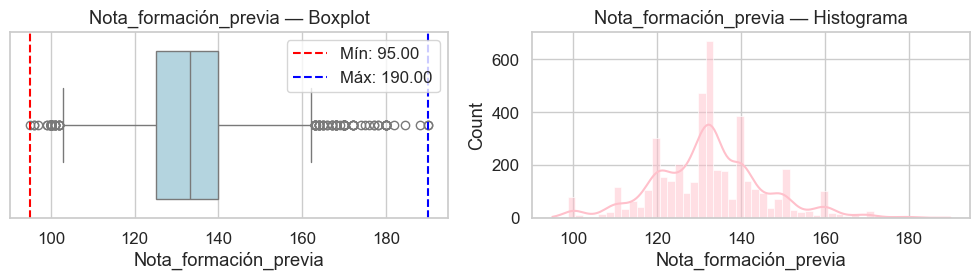

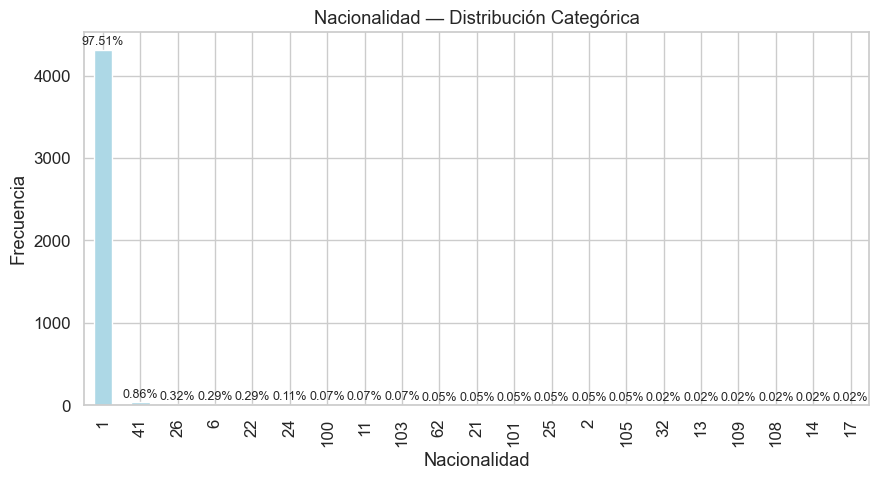

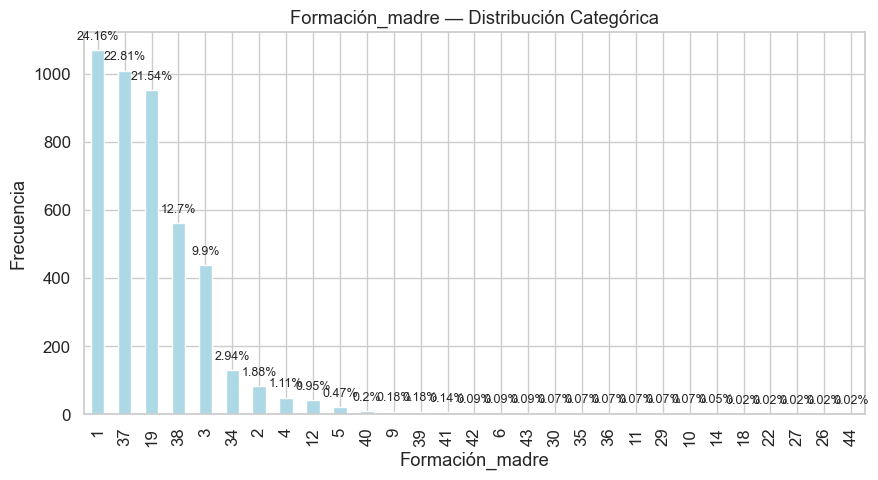

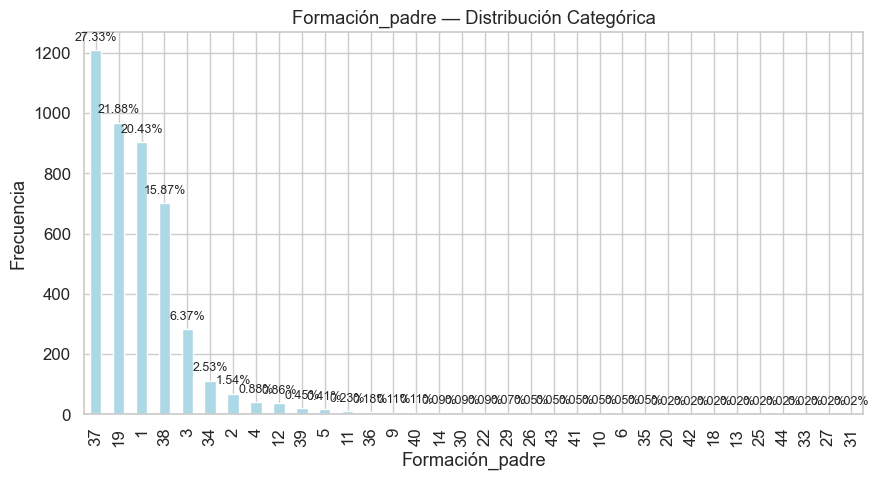

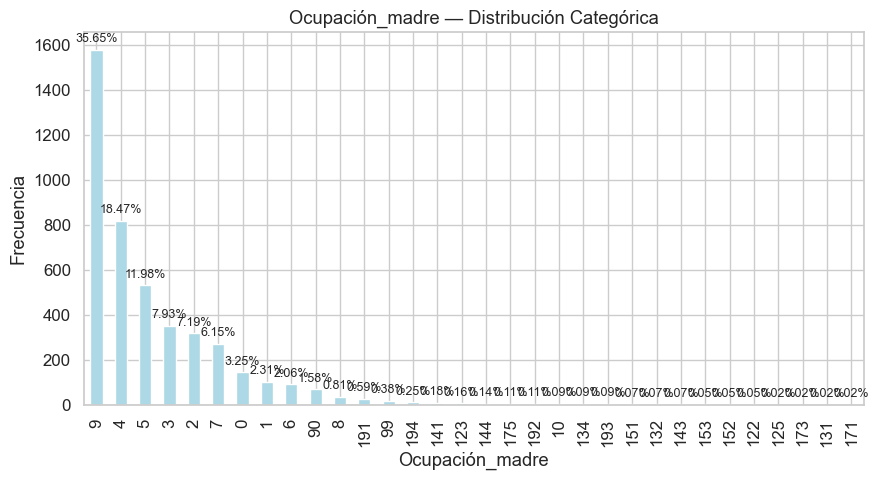

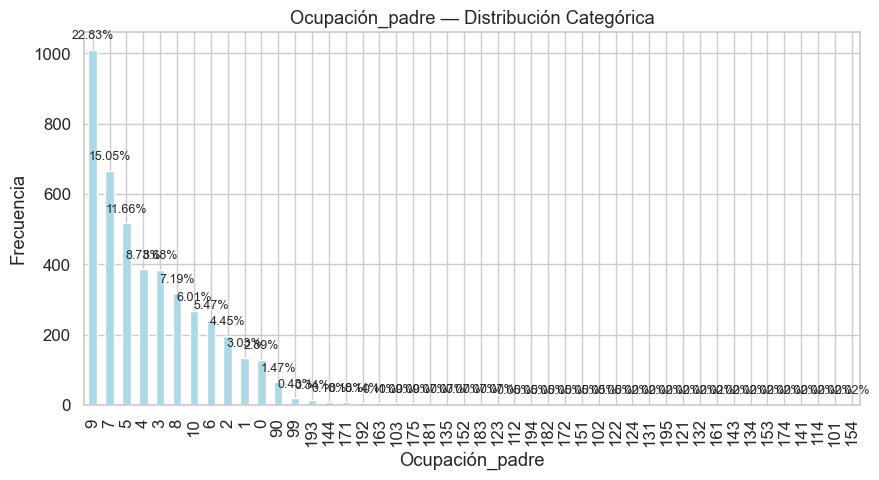

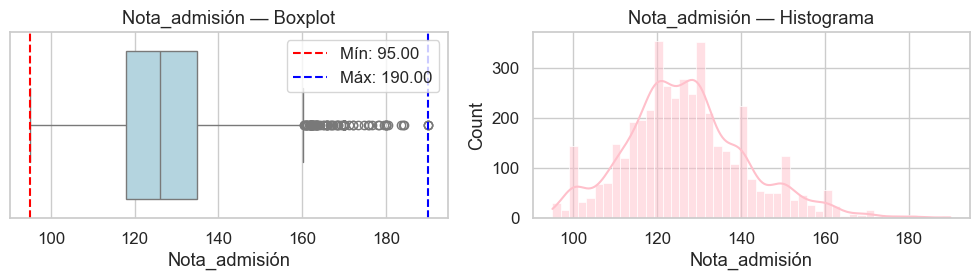

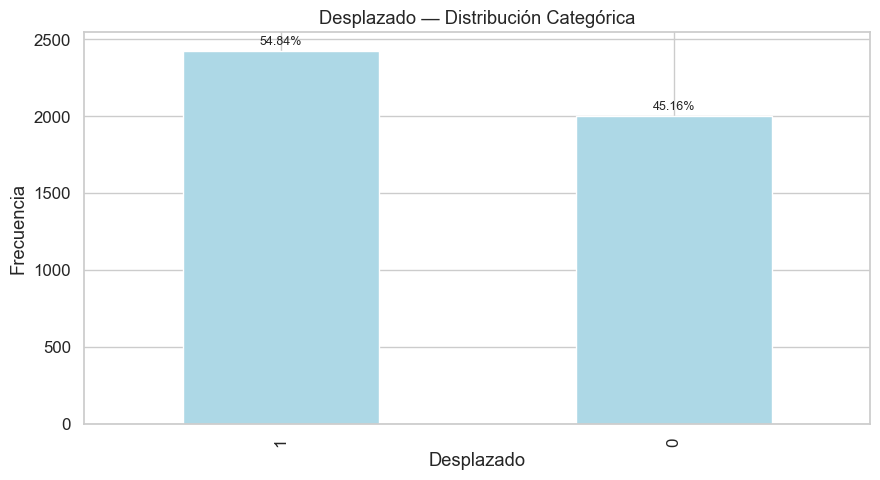

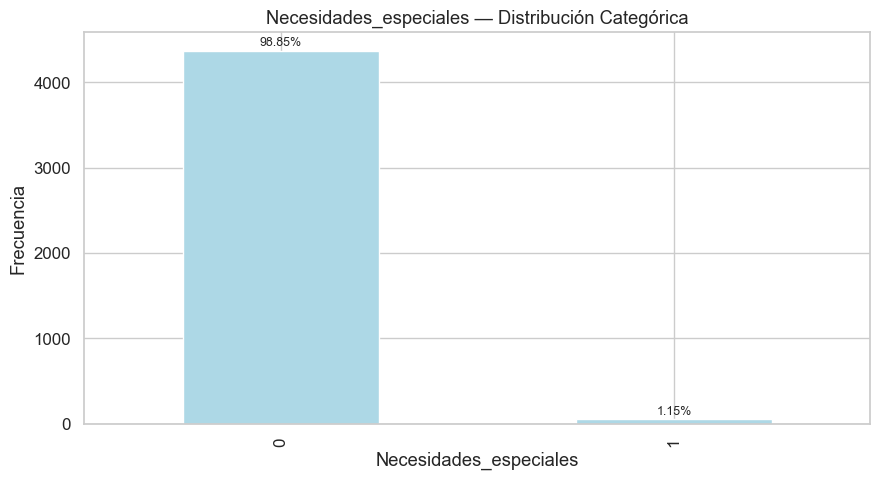

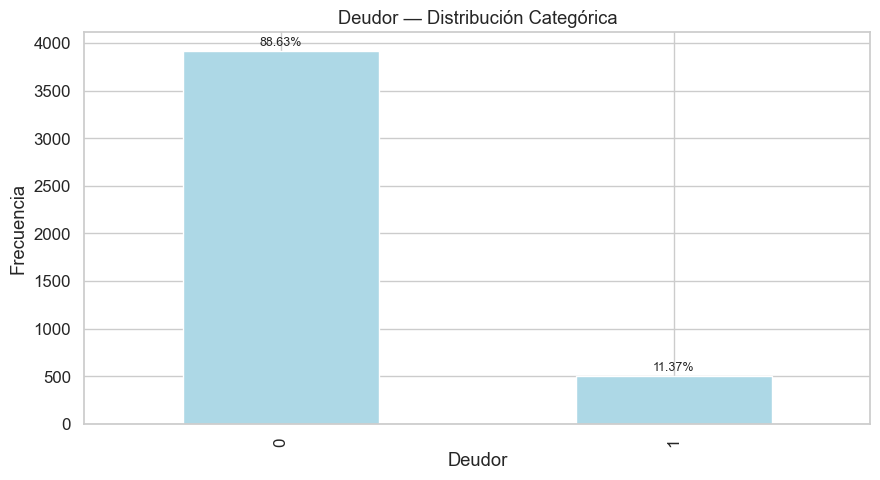

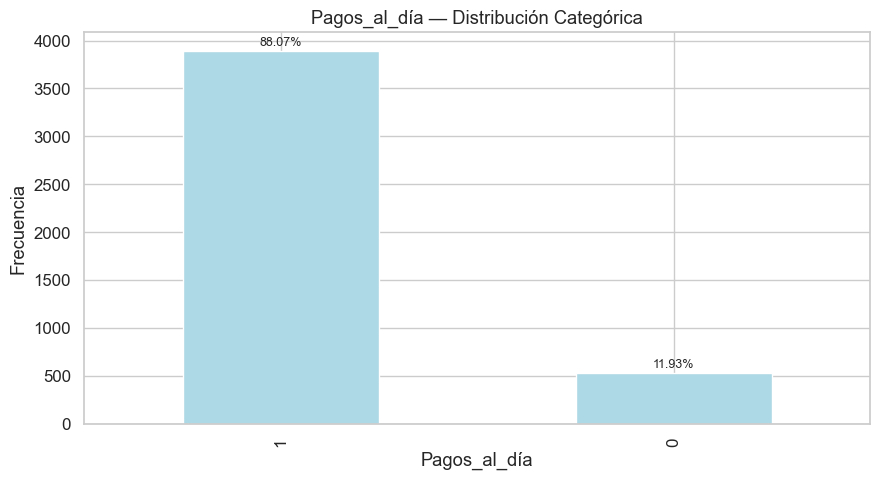

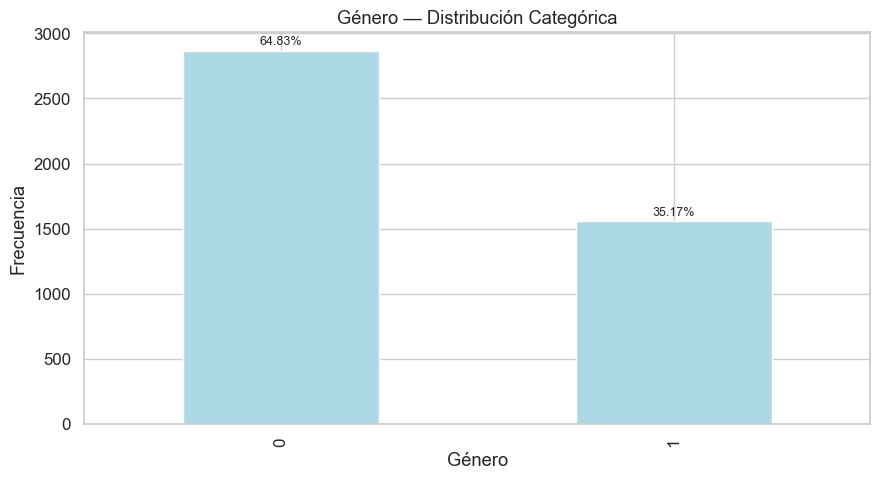

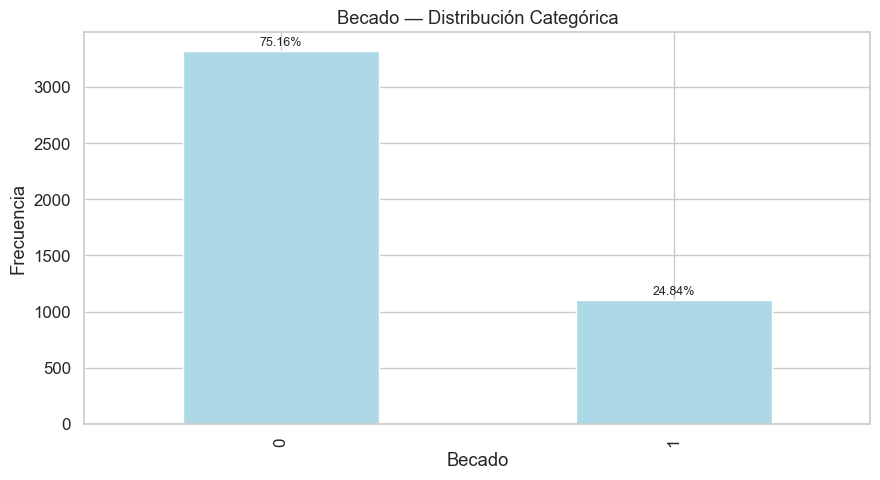

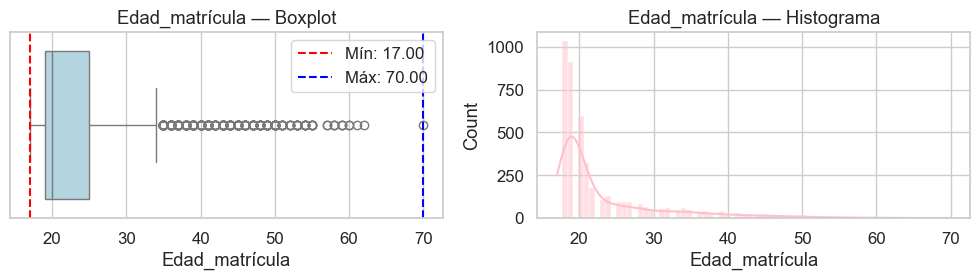

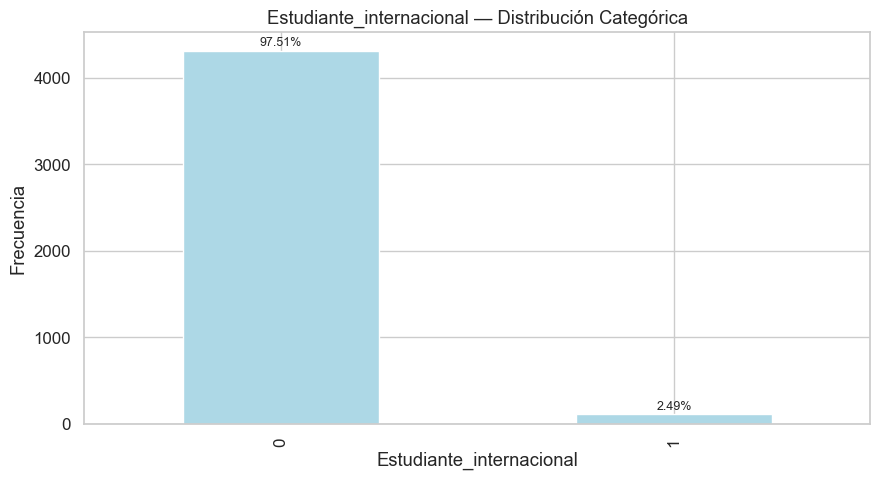

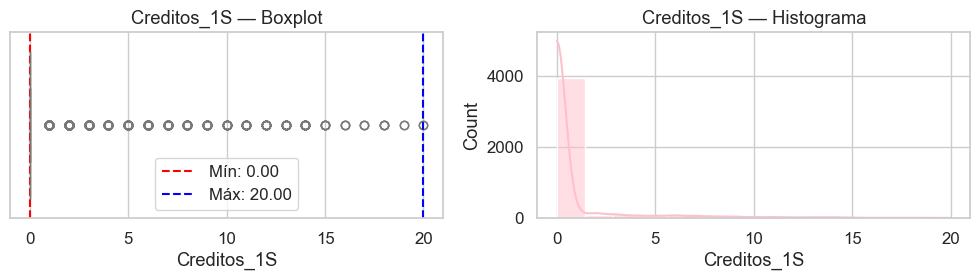

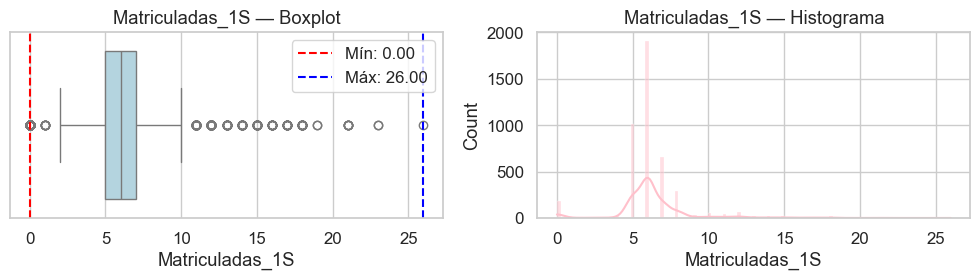

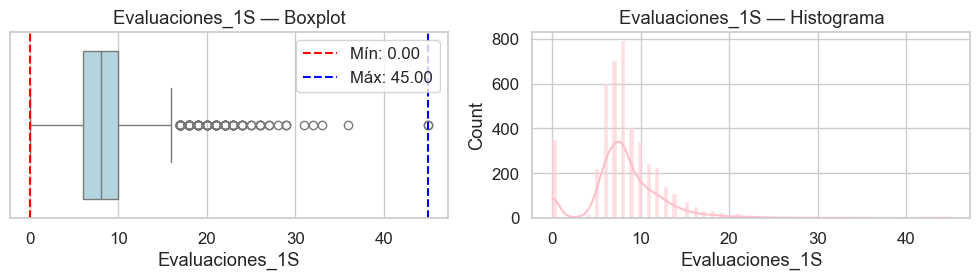

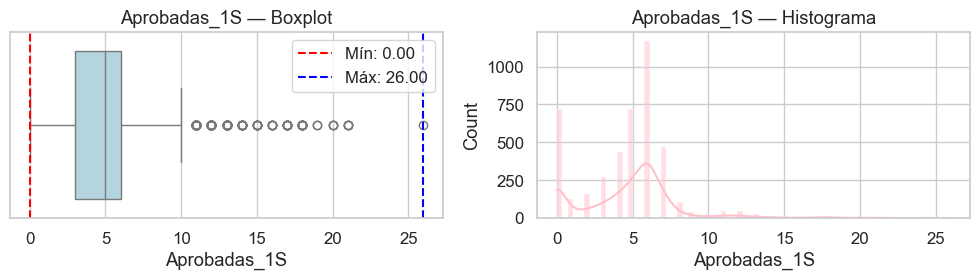

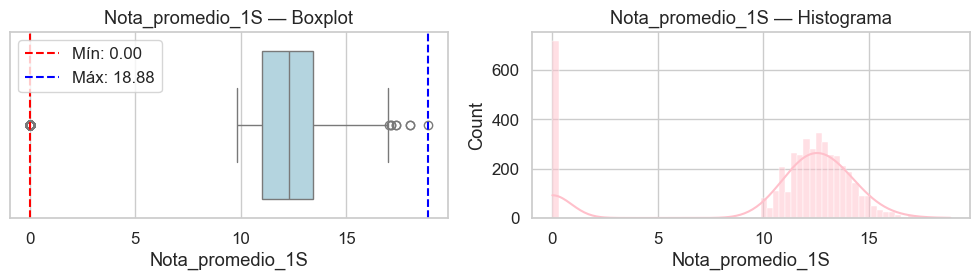

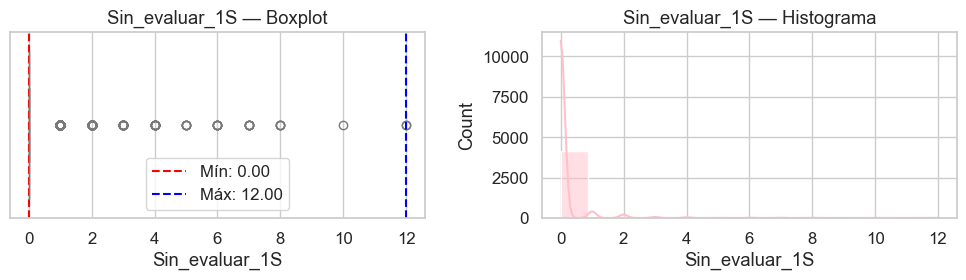

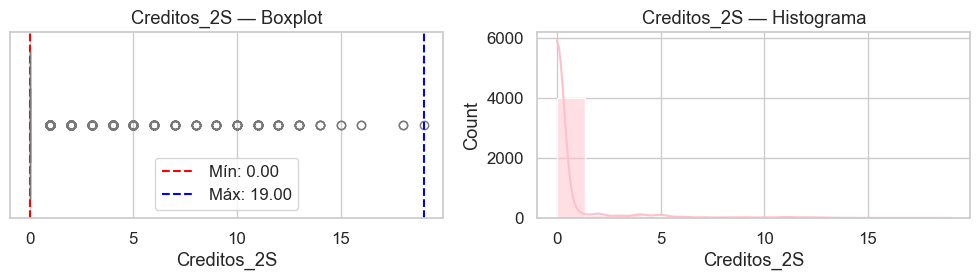

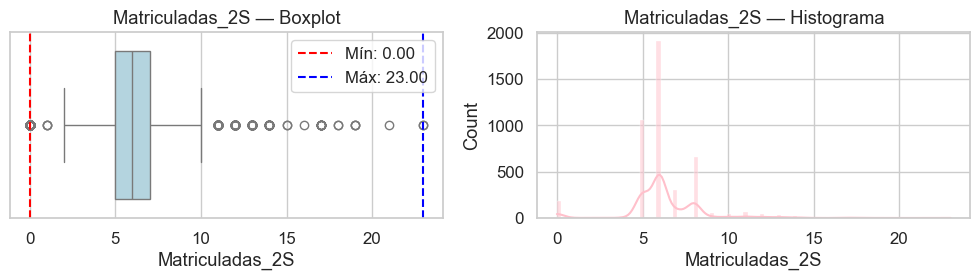

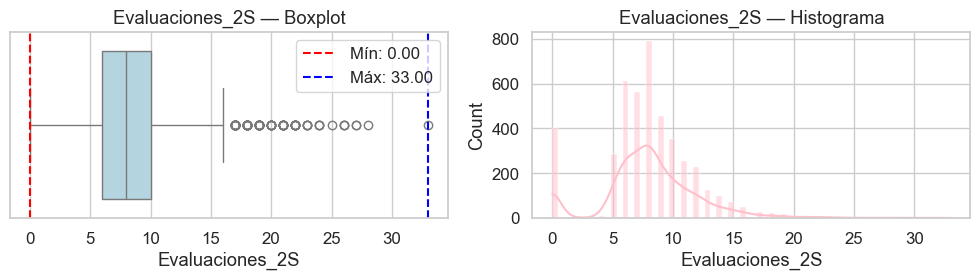

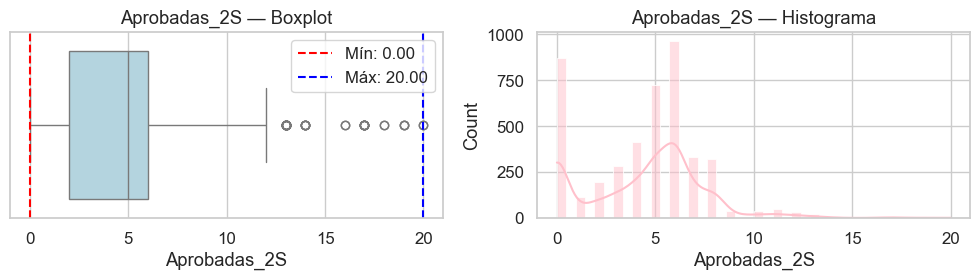

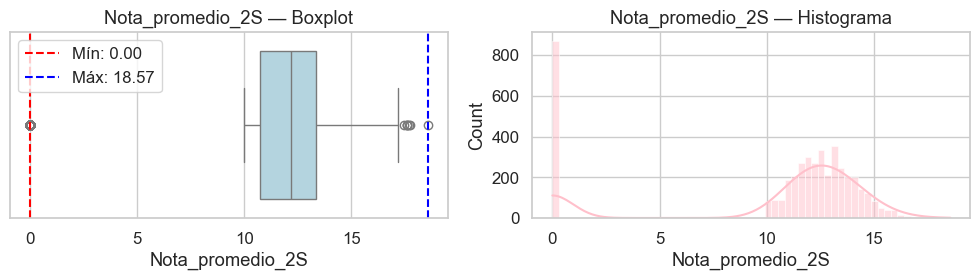

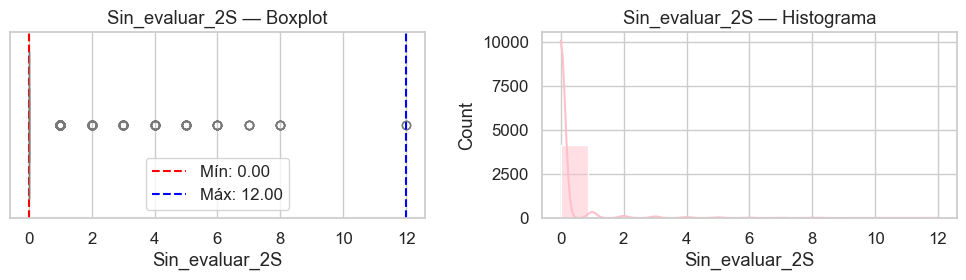

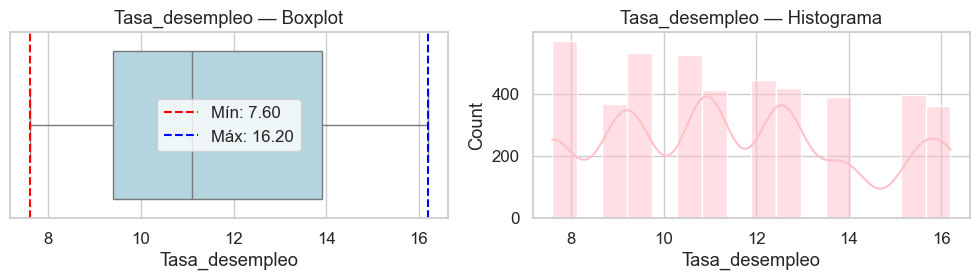

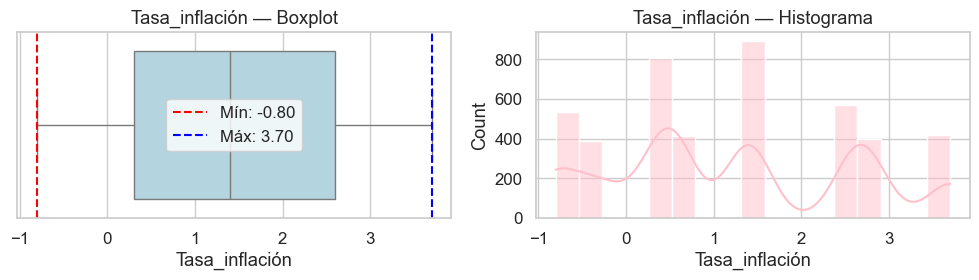

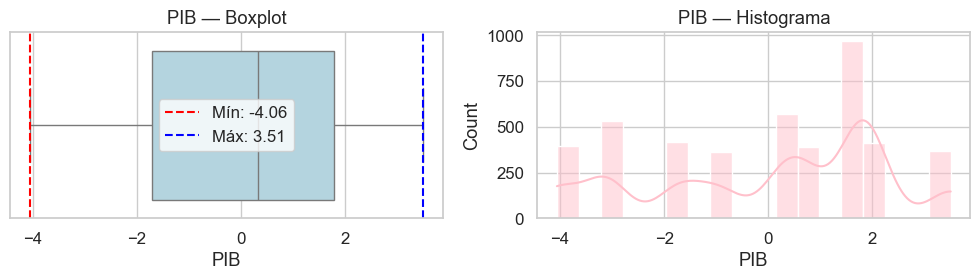

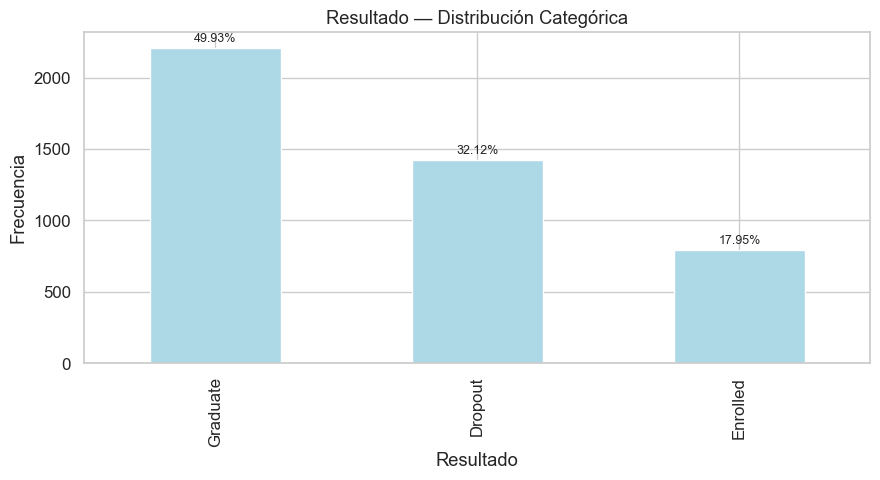

In [10]:
for col in predict_students.columns:

    # Variables Cuantitativas
    if col in variables["cuantitativas"]:
        # Creamos dos gráficos lado a lado (boxplot y histograma)
        fig, axes = plt.subplots(1, 2, figsize=(10, 3))

        # Boxplot
        # Permite detectar valores extremos (outliers) y observar la dispersión.
        sns.boxplot(x=predict_students[col], ax=axes[0], color='lightblue')

        # Se añaden líneas verticales marcando el valor mínimo y máximo observados.
        axes[0].axvline(predict_students[col].min(), color='red', linestyle='--',
                        label=f'Mín: {predict_students[col].min():.2f}')
        axes[0].axvline(predict_students[col].max(), color='blue', linestyle='--',
                        label=f'Máx: {predict_students[col].max():.2f}')

        axes[0].set_title(f'{col} — Boxplot')
        axes[0].legend()

        # Histograma
        # Muestra la forma de la distribución: normal, sesgada, bimodal, etc.
        sns.histplot(predict_students[col], kde=True, ax=axes[1], color='pink')
        axes[1].set_title(f'{col} — Histograma')

        plt.tight_layout()
        plt.show()

    # Variables Categóricas
    else:
        fig, ax = plt.subplots(figsize=(9, 5))

        # Se cuentan las frecuencias y se calculan los porcentajes
        counts = predict_students[col].value_counts()
        total = len(predict_students[col])
        percentages = (counts / total * 100).round(2)

        # --- Gráfico de Barras ---
        # Permite observar la distribución de las categorías (niveles) de la variable.
        bars = counts.plot(kind='bar', ax=ax, color='lightblue')

        # Añadimos etiquetas con el porcentaje sobre cada barra
        for i, bar in enumerate(ax.patches):
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,   # Centrado sobre la barra
                height + total * 0.005,              # Levemente arriba del tope
                f"{percentages.iloc[i]}%",           # Texto (porcentaje)
                ha='center', va='bottom', fontsize=9
            )

        ax.set_title(f'{col} — Distribución Categórica')
        ax.set_xlabel(col)
        ax.set_ylabel('Frecuencia')

        plt.tight_layout()
        plt.show()


Al analizar cada grafica y sus estadisticas descriptivas se puede concluir lo siguiente:

1. Marital status: Presenta una fuerte concentración en la categoría “soltero”, sin valores fuera del rango válido (1-6), dado el bajo número de casos en las categorías 3 y 6, se agrupara en una sola clase “Otros” para reducir el ruido y mejorar la estabilidad del modelo, finalmente, esta variable se tratara como categórica y se codificara mediante One-Hot Encoding, ya que se empleará en un modelo de regresión logística multiclase.

2. Application mode: Muestra una fuerte concentración en la categoría 1 (38.6%), seguida de las categorías 17 (19.7%) y 39 (17.7%), que también presentan proporciones significativas. El resto de las modalidades tiene una frecuencia muy baja, lo que indica un desequilibrio moderado en las vías de ingreso, aunque sin valores fuera del rango esperado. Esto sugiere que la mayoría de los estudiantes acceden por unas pocas modalidades dominantes. Dado el bajo número de casos en varias categorías menores, se recomienda agrupar las menos representadas en una clase “Otros”, tratando la variable como categórica y aplicando One-Hot Encoding para su uso en el modelo de regresión logística multiclase.

3. Application order: evidencia que la mayoría de los estudiantes fueron aceptados en su segunda preferencia de carrera (68.4 %), y muy pocos en su primera opción (0.02 %). Este patrón podría reflejar limitaciones en la admisión por cupos o preferencias muy concentradas en ciertas carreras.
No hay errores de codificación aparentes, pero las categorías con muy baja frecuencia (0 y 9) pueden agruparse como “otros” para evitar ruido estadístico.
La variable debe tratarse como categórica ordinal —puede codificarse con One-Hot Encoding o como numérica ordinal si el modelo considera la jerarquía de preferencia.  

4. Course: representa la carrera en la que el estudiante está matriculado y muestra una distribución desigual, con predominio de la carrera 9500 (Derecho, 17.3%), seguida de 9147 (Ingeniería Informática, 8.6%) y 9238 (Gestión, 8.0%), mientras que otras presentan frecuencias menores al 5 %, como 33 (0.27%) y 9556 (1.94%). Esta concentración indica que algunas carreras tienen una matrícula mucho mayor, aunque todos los códigos corresponden a valores válidos. Dado que se trata de una variable categórica nominal, debe codificarse mediante One-Hot Encoding antes de aplicar la regresión logística multiclase, considerando además agrupar las carreras con baja frecuencia para evitar ruido en el modelo.

6. Previous qualification: Dado que el 84.02 % de los estudiantes presenta una calificación previa igual a 1 y las demás categorías tienen frecuencias muy bajas, es conveniente agrupar todas esas categorías minoritarias en una sola etiqueta denominada “Otro”, lo que simplifica la variable, evita el sobreajuste y facilita la interpretación del modelo al conservar la información relevante

7. Previous qualification (grade): Los gráficos muestran que las calificaciones previas de los estudiantes se concentran principalmente entre 120 y 150, con una mediana cercana a 135, lo que indica un rendimiento medio general. El rango total va de 95 a 190, aunque existen algunos valores atípicos en ambos extremos, esto indica que pocos estudiantes adquieren una calificacion alta y baja, en el contexto de predicción de deserción, esta variable puede ser un buen indicador del desempeño inicial, siguiendo "logica" valores bajos podrían asociarse a mayor riesgo de deserción, mientras que valores altos reflejan una base académica más sólida.

13. Admision grade: Las calificaciones de admisión se concentran entre 110 y 150 puntos, con pocos valores extremos fuera de este rango. Aunque existen outliers altos, no es recomendable eliminarlos, ya que representan casos reales de alto rendimiento académico y aportan información valiosa para analizar la variabilidad en el desempeño estudiantil.

## Boxplot con la variable objetivo

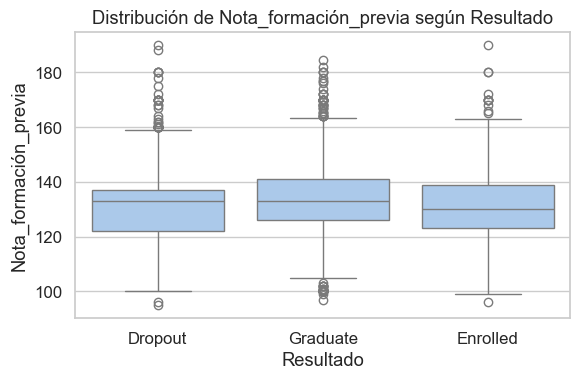

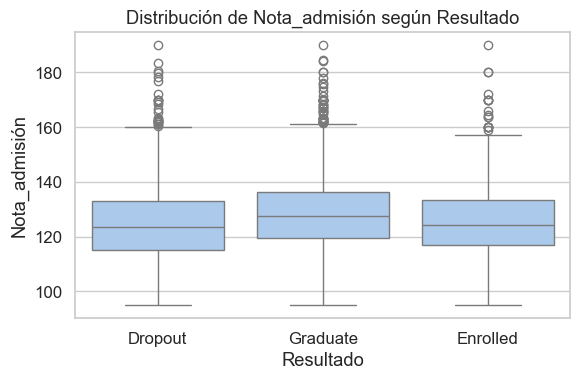

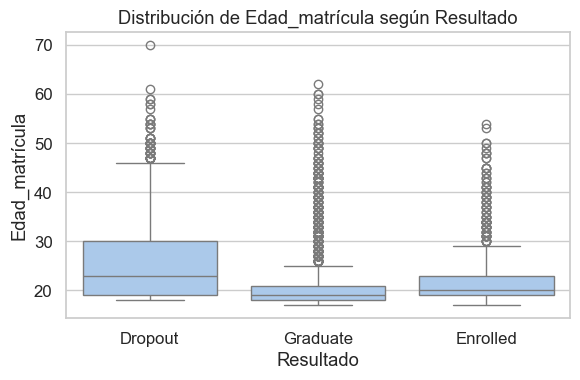

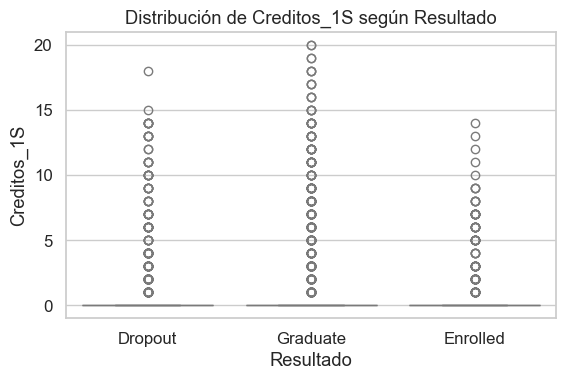

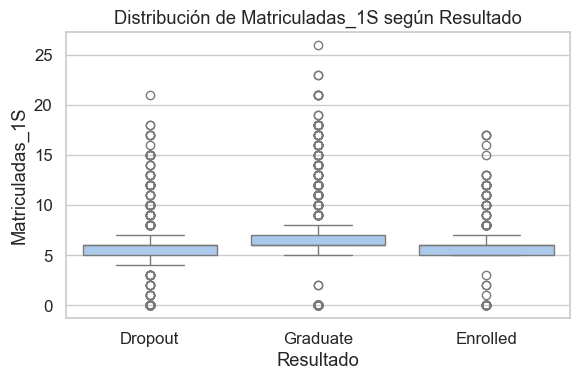

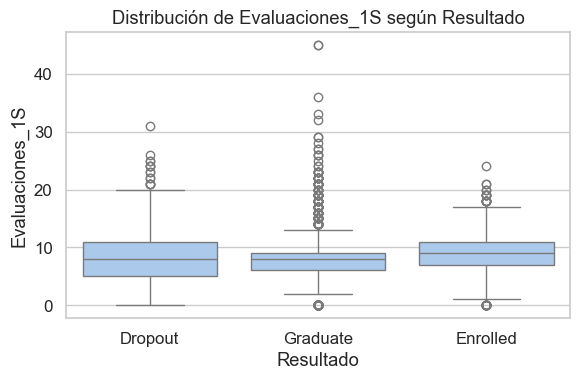

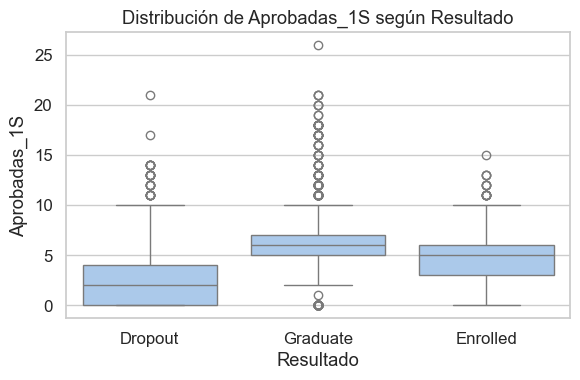

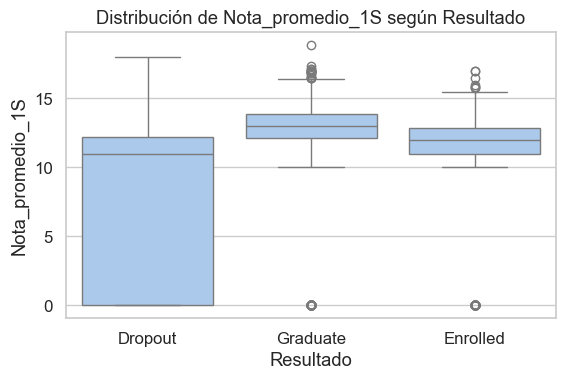

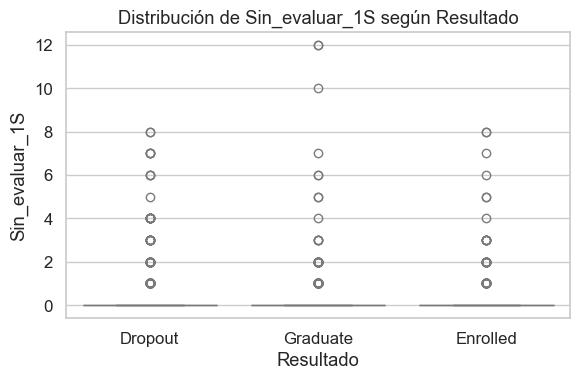

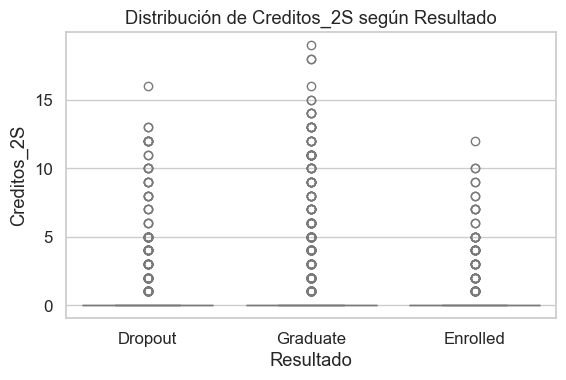

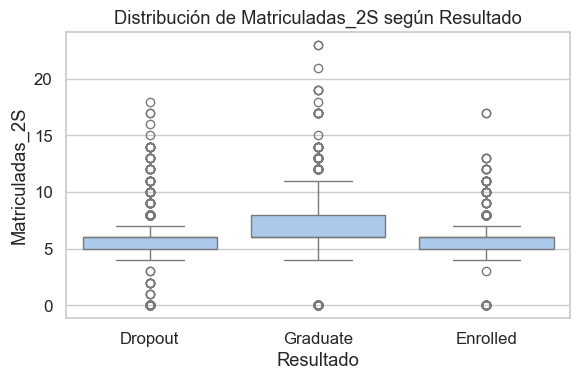

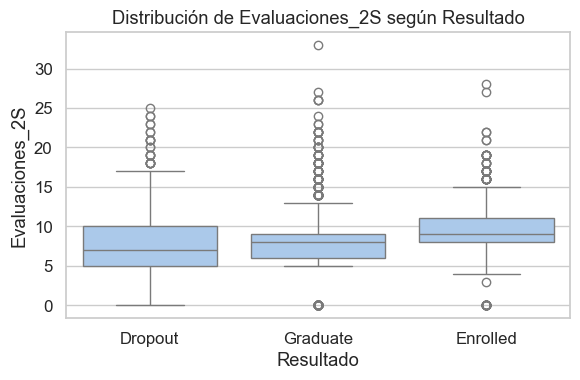

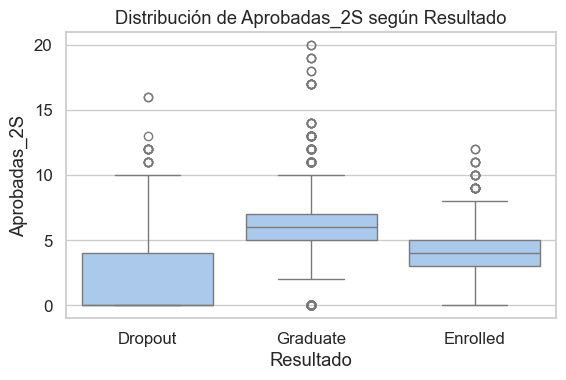

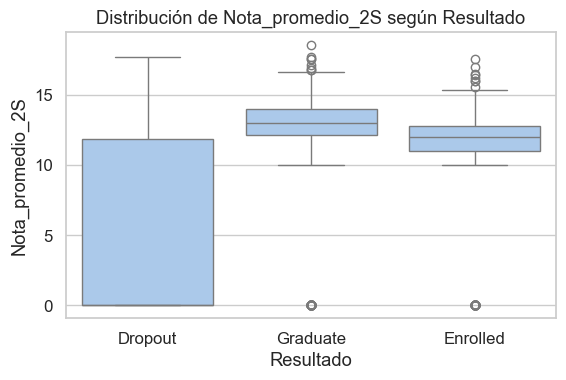

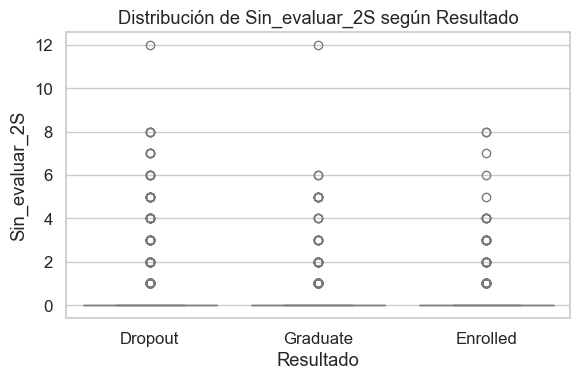

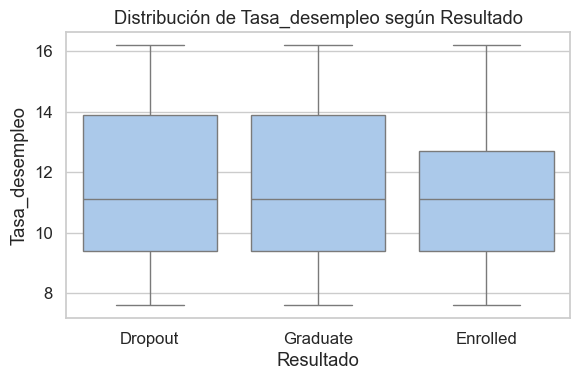

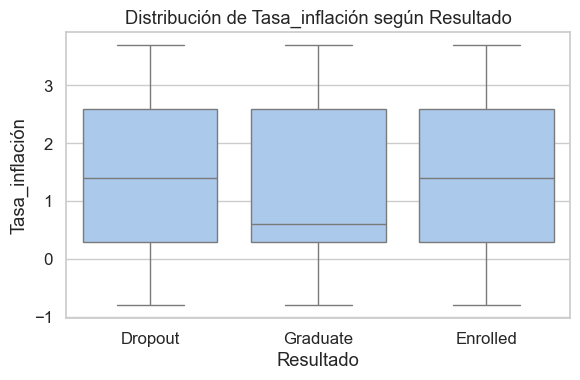

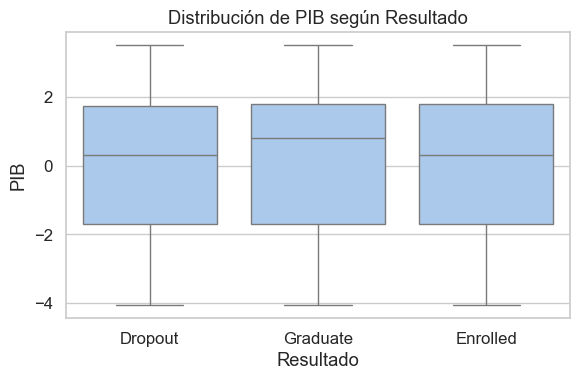

In [11]:
target = "Resultado"  # ajusta al nombre real de tu variable objetivo
num_cols = variables['cuantitativas']  # tus variables numéricas

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=target, y=col, data=predict_students)
    plt.title(f"Distribución de {col} según {target}")
    plt.xlabel(target)
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

## Explorando el balance de clases de la variable objetivo

Conteo de clases:
 Resultado
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Porcentaje de clases:
 Resultado
Graduate    49.93
Dropout     32.12
Enrolled    17.95
Name: proportion, dtype: float64


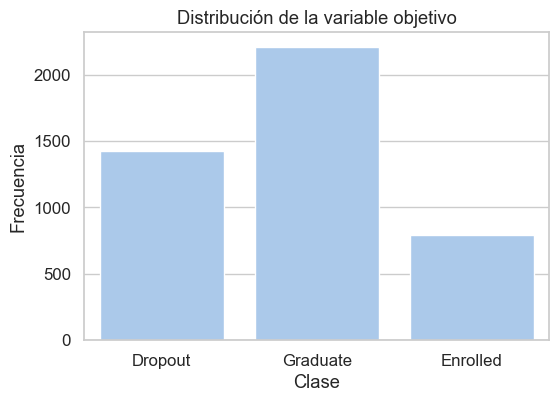

In [12]:
# Conteo
conteo = predict_students['Resultado'].value_counts()

# Conteo relativo (porcentaje)
porcentaje = predict_students['Resultado'].value_counts(normalize=True) * 100

print("Conteo de clases:\n", conteo)
print("\nPorcentaje de clases:\n", porcentaje.round(2))

# --- Gráfico del balance de clases ---
plt.figure(figsize=(6,4))
sns.countplot(x='Resultado', data=predict_students)
plt.title('Distribución de la variable objetivo')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

Con los datos observados Graduate: 49.93%, Dropout: 32.12%, y Enrolled: 17.95%— se aprecia una relación aproximada de 3:2:1 entre las clases. Esto refleja un desbalance moderado, donde la clase Graduate es la más frecuente y la clase Enrolled la menos representada. En términos prácticos, el modelo podría inclinarse a predecir más casos de Graduate y menos de Enrolled, afectando el rendimiento en clases minoritarias.

## Aplicando diagrama de correlacion para variables categoricas y numericas

El código implementa un análisis de correlación mixta entre variables numéricas y categóricas para explorar asociaciones y reducir dimensionalidad antes del modelado. Se utilizan tres métricas: la correlación de Spearman para pares numéricos, que mide la relación monótona entre variables, Cramér's V corregido para pares categóricos, derivado del estadístico para relaciones entre una variable numérica y una categórica, que mide la proporción de varianza explicada del valor numérico por el grupo al que pertenece. Estas métricas producen valores normalizados entre 0 y 1, facilitando su comparación.
La función 'heatmap_mixto' genera una matriz M que combina las tres medidas anteriores y muestra un mapa de calor que visualiza la fuerza de las asociaciones. El algoritmo convierte los tipos de datos apropiadamente, calcula las correlaciones según el tipo de variable y rellena la matriz de forma simétrica.

In [13]:

def cramers_v_corrected(x, y):
    tabla = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(tabla, correction=False)
    n = tabla.to_numpy().sum()
    r, k = tabla.shape
    phi2 = chi2 / n
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    denom = min((kcorr - 1), (rcorr - 1))
    return np.sqrt(phi2corr / denom) if denom > 0 else 0.0

def correlation_ratio(categories, values):
    cats, _ = pd.factorize(categories)
    groups = [values[cats == i] for i in range(len(np.unique(cats)))]
    means = np.array([g.mean() for g in groups if len(g) > 0])
    counts = np.array([len(g) for g in groups if len(g) > 0])
    grand_mean = values.mean()
    ss_between = np.sum(counts * (means - grand_mean) ** 2)
    ss_total = np.sum((values - grand_mean) ** 2)
    return np.sqrt(ss_between / ss_total) if ss_total > 0 else 0.0

def heatmap_mixto(df, num_cols, cat_cols, annot=False, figsize=(14, 12), title="Mapa de calor mixto", umbral_baja=0.1, umbral_alta=0.8, usar_abs=True):
    cols = list(num_cols) + list(cat_cols)
    M = pd.DataFrame(np.zeros((len(cols), len(cols))), index=cols, columns=cols, dtype=float)

    # asegurar tipos
    dfn = df[num_cols].apply(pd.to_numeric, errors='coerce')
    dfc = df[cat_cols].astype("string")

    # Num-Num (Spearman)
    if len(num_cols) > 0:
        spearman = dfn.corr(method='spearman')
        M.loc[num_cols, num_cols] = spearman.values

    # Cat-Cat (Cramer's V)
    for i, c1 in enumerate(cat_cols):
        for c2 in cat_cols[i:]:
            v = cramers_v_corrected(dfc[c1], dfc[c2])
            M.loc[c1, c2] = v
            M.loc[c2, c1] = v

    # Num-Cat (η)
    for n in num_cols:
        for c in cat_cols:
            eta = correlation_ratio(dfc[c], dfn[n])
            M.loc[n, c] = eta
            M.loc[c, n] = eta

    # diagonal
    np.fill_diagonal(M.values, 1.0)

    # variables con baja correlación respecto al target
    target = "Resultado"  # ajusta nombre exacto
    bajas = [c for c in M.columns if c != target and M.loc[c, target] < umbral_baja]

    # pares con alta correlación entre cualquier par de variables
    pares_altos = []
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            val = M.iat[i, j]
            if (abs(val) if usar_abs else val) >= umbral_alta:
                pares_altos.append((cols[i], cols[j], float(val)))

    altas_df = pd.DataFrame(pares_altos, columns=["var1", "var2", "coef"]) \
                 .assign(abs_coef=lambda d: d["coef"].abs()) \
                 .sort_values("abs_coef", ascending=False) \
                 .drop(columns="abs_coef")


    # diagonal
    np.fill_diagonal(M.values, 1.0)

    # plot
    plt.figure(figsize=figsize)
    sns.heatmap(M, cmap="coolwarm", vmin=0, vmax=1, annot=annot, square=True)
    plt.title(title)
    plt.tight_layout()
    plt.show()

    print(f"\nVariables con baja correlación (< {umbral_baja}):")
    print(bajas)

    return M, altas_df

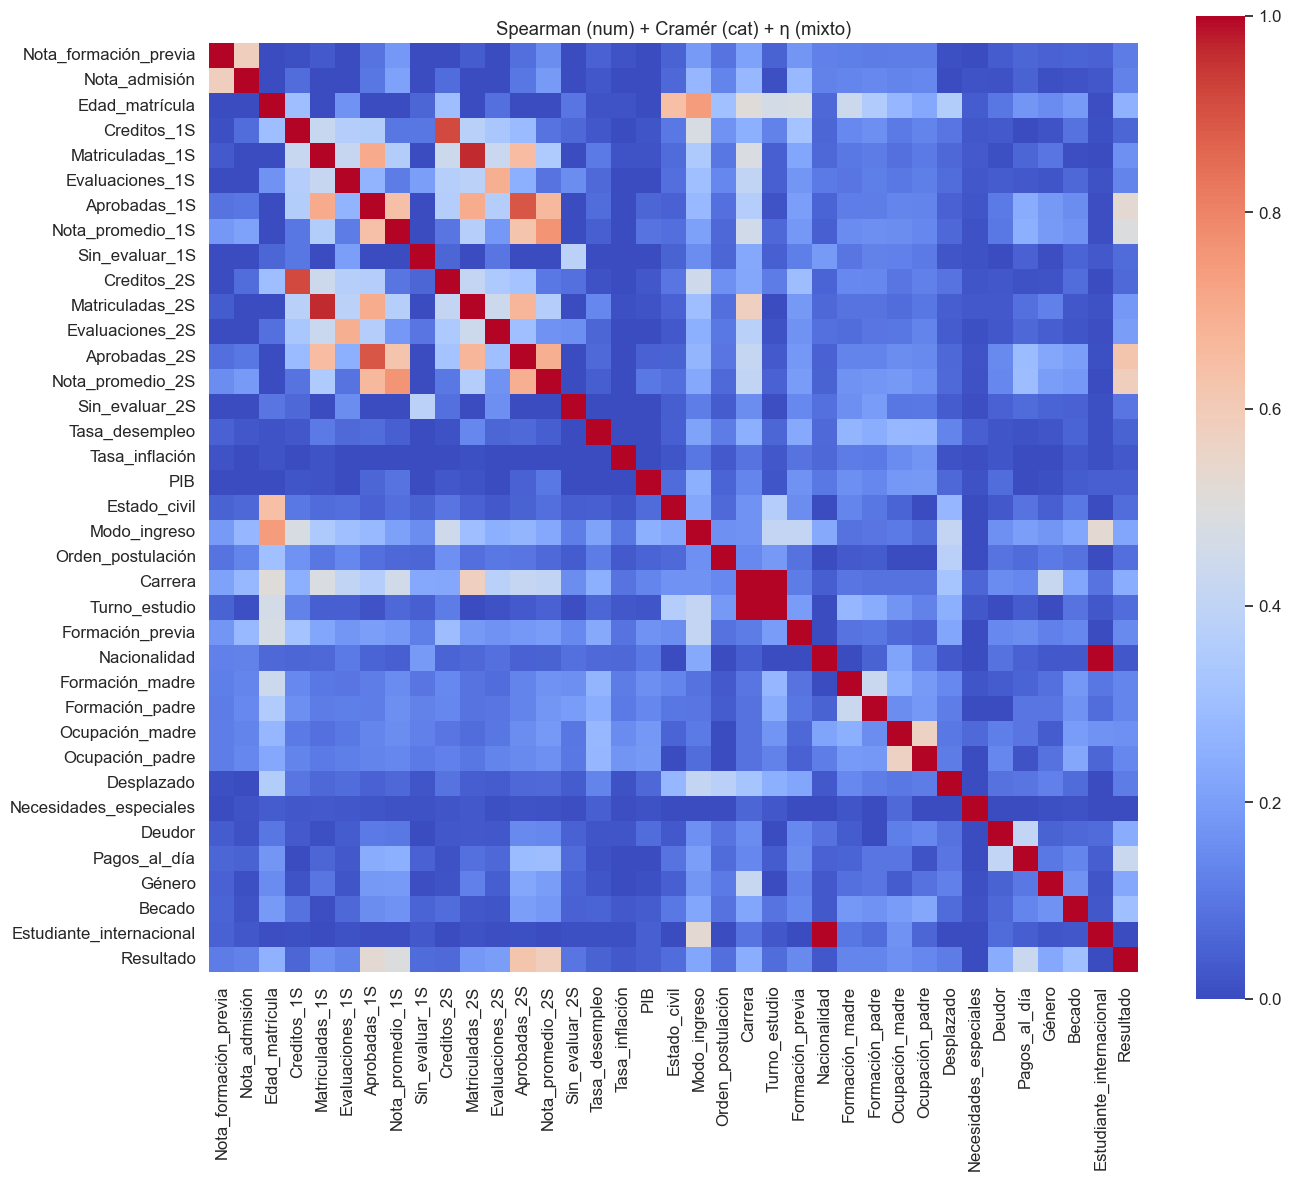


Variables con baja correlación (< 0.1):
['Creditos_1S', 'Sin_evaluar_1S', 'Creditos_2S', 'Sin_evaluar_2S', 'Tasa_desempleo', 'Tasa_inflación', 'PIB', 'Estado_civil', 'Orden_postulación', 'Turno_estudio', 'Nacionalidad', 'Necesidades_especiales', 'Estudiante_internacional']


,Nota_formación_previa,Nota_admisión,Edad_matrícula,Creditos_1S,Matriculadas_1S,Evaluaciones_1S,Aprobadas_1S,Nota_promedio_1S,Sin_evaluar_1S,Creditos_2S,Matriculadas_2S,Evaluaciones_2S,Aprobadas_2S,Nota_promedio_2S,Sin_evaluar_2S,Tasa_desempleo,Tasa_inflación,PIB,Estado_civil,Modo_ingreso,Orden_postulación,Carrera,Turno_estudio,Formación_previa,Nacionalidad,Formación_madre,Formación_padre,Ocupación_madre,Ocupación_padre,Desplazado,Necesidades_especiales,Deudor,Pagos_al_día,Género,Becado,Estudiante_internacional,Resultado
Nota_formación_previa,1.000000,0.584624,-0.144713,0.009901,0.035115,-0.069398,0.092706,0.182157,0.003187,-0.001368,0.036037,-0.061298,0.081666,0.152982,-0.016295,0.048137,0.019191,-0.072473,0.053465,0.190928,0.091971,0.209196,0.052597,0.177334,0.121776,0.120449,0.112726,0.113808,0.115693,0.011001,0.001458,0.037507,0.060578,0.047874,0.055965,0.048529,0.111304
Nota_admisión,0.584624,1.000000,-0.101757,0.075155,-0.005681,-0.094901,0.100086,0.208844,-0.000103,0.075283,0.001162,-0.061483,0.099049,0.188507,-0.023679,0.026672,-0.018257,-0.040207,0.064397,0.276693,0.130118,0.278517,0.007970,0.283634,0.125223,0.134820,0.144335,0.129970,0.138580,0.000543,0.018306,0.014423,0.054132,0.008315,0.018881,0.025274,0.125980
Edad_matrícula,-0.144713,-0.101757,1.000000,0.298854,0.000804,0.170565,-0.165780,-0.209917,0.060934,0.300595,-0.031458,0.082710,-0.187984,-0.213472,0.094494,0.018600,0.018181,-0.056524,0.642746,0.743359,0.307149,0.510419,0.462280,0.474731,0.065867,0.439324,0.355312,0.276486,0.227312,0.362032,0.036987,0.098793,0.178099,0.148835,0.189917,0.007111,0.255757
Creditos_1S,0.009901,0.075155,0.298854,1.000000,0.423096,0.366472,0.361512,0.100757,0.100024,0.914262,0.376104,0.330536,0.288796,0.093473,0.063940,0.024184,-0.001823,0.021784,0.102272,0.478538,0.170886,0.250226,0.127466,0.317188,0.059375,0.140707,0.158972,0.107255,0.130524,0.097268,0.024411,0.034053,0.003803,0.017099,0.088718,0.008550,0.059973
Matriculadas_1S,0.035115,-0.005681,0.000804,0.423096,1.000000,0.420242,0.706555,0.363205,-0.018757,0.440119,0.961826,0.431285,0.653198,0.351472,-0.020600,0.108336,0.016873,0.017965,0.073729,0.346669,0.099527,0.484819,0.043056,0.218771,0.066038,0.104096,0.109720,0.082715,0.107200,0.063812,0.034837,0.010652,0.058721,0.095253,0.004927,0.001310,0.161856
Evaluaciones_1S,-0.069398,-0.094901,0.170565,0.366472,0.420242,1.000000,0.262063,0.111950,0.202056,0.369342,0.385720,0.693603,0.251594,0.090180,0.152757,0.067037,-0.039721,-0.096700,0.079031,0.304401,0.139340,0.402479,0.045889,0.179281,0.106147,0.095078,0.120616,0.104197,0.120807,0.077665,0.025972,0.036054,0.027514,0.021334,0.063429,0.012543,0.129204
Aprobadas_1S,0.092706,0.100086,-0.165780,0.361512,0.706555,0.262063,1.000000,0.639791,-0.068897,0.366941,0.699429,0.364337,0.891679,0.662830,-0.073444,0.074288,-0.002490,0.059292,0.047533,0.281786,0.085121,0.367062,0.016935,0.201114,0.057488,0.114596,0.114417,0.135514,0.131590,0.047682,0.019873,0.106657,0.239347,0.183829,0.153772,0.005290,0.529201
Nota_promedio_1S,0.182157,0.208844,-0.209917,0.100757,0.363205,0.111950,0.639791,1.000000,-0.016931,0.096860,0.368011,0.181930,0.628593,0.762357,-0.046671,0.045004,-0.037430,0.091844,0.079771,0.203711,0.065680,0.456482,0.063974,0.183298,0.046854,0.150094,0.157757,0.153923,0.137874,0.064815,0.012284,0.104170,0.250394,0.189448,0.168324,0.006314,0.493983
Sin_evaluar_1S,0.003187,-0.000103,0.060934,0.100024,-0.018757,0.202056,-0.068897,-0.016931,1.000000,0.058695,-0.032372,0.096252,-0.054598,-0.040767,0.383552,-0.066878,-0.067866,-0.183582,0.053442,0.155430,0.060623,0.228189,0.045630,0.117911,0.188513,0.094747,0.125035,0.124895,0.106538,0.021671,0.012324,0.001812,0.049775,0.006302,0.057770,0.031222,0.071746
Creditos_2S,-0.001368,0.075283,0.300595,0.914262,0.440119,0.369342,0.366941,0.096860,0.058695,1.000000,0.413560,0.342310,0.319168,0.103378,0.082372,0.012190,-0.000530,0.023758,0.096701,0.447083,0.162199,0.223118,0.111953,0.293649,0.057287,0.141620,0.140107,0.095508,0.121922,0.091738,0.02

,var1,var2,coef
3,Carrera,Turno_estudio,0.998302
4,Nacionalidad,Estudiante_internacional,0.997849
1,Matriculadas_1S,Matriculadas_2S,0.961826
0,Creditos_1S,Creditos_2S,0.914262
2,Aprobadas_1S,Aprobadas_2S,0.891679


In [14]:
variables['categoricas'] = variables['categoricas'] + ['Resultado']
matriz, altas_df= heatmap_mixto(predict_students, variables['cuantitativas'], variables['categoricas'], annot=False,
                       title="Spearman (num) + Cramér (cat) + η (mixto)")
display(matriz)
display(altas_df)

Las variables “Carrera” y “Turno_estudio” (0.998) están casi perfectamente asociadas, probablemente porque ciertos programas se dictan en horarios específicos. “Nacionalidad” y “Estudiante_internacional” (0.998) también son prácticamente equivalentes, ya que una categoría determina la otra. Las variables académicas entre semestres (Matriculadas_1S–Matriculadas_2S, Créditos_1S–Créditos_2S, Aprobadas_1S–Aprobadas_2S) presentan correlaciones entre 0.89 y 0.96, reflejando que el desempeño y carga académica del primer semestre predicen fuertemente los del segundo. En conjunto, estas relaciones sugieren que conviene eliminar o combinar algunas de estas variables para evitar colinealidad en modelos posteriores.

Variables con baja correlación numéricas: ['Creditos_1S', 'Sin_evaluar_1S', 'Creditos_2S', 'Sin_evaluar_2S', 'Tasa_desempleo', 'Tasa_inflación', 'PIB']
Variables con baja correlación categóricas: ['Estado_civil', 'Orden_postulación', 'Turno_estudio', 'Nacionalidad', 'Necesidades_especiales', 'Estudiante_internacional']

===== Análisis bivariado: numéricas vs Resultado =====

>>> Variable numérica: Creditos_1S


,count,mean,std,min,25%,50%,75%,max
Resultado,,,,,,,,
Dropout,1421.0,0.609,2.105,0.0,0.0,0.0,0.0,18.0
Enrolled,794.0,0.508,1.716,0.0,0.0,0.0,0.0,14.0
Graduate,2209.0,0.847,2.686,0.0,0.0,0.0,0.0,20.0


ANOVA F = 7.979, p-value = 0.00035


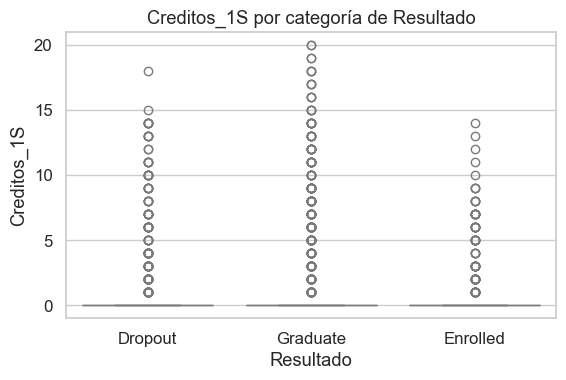


>>> Variable numérica: Sin_evaluar_1S


,count,mean,std,min,25%,50%,75%,max
Resultado,,,,,,,,
Dropout,1421.0,0.192,0.795,0.0,0.0,0.0,0.0,8.0
Enrolled,794.0,0.178,0.741,0.0,0.0,0.0,0.0,8.0
Graduate,2209.0,0.088,0.590,0.0,0.0,0.0,0.0,12.0


ANOVA F = 11.437, p-value = 0.00001


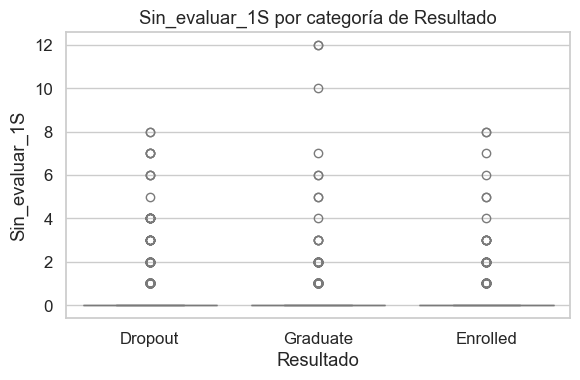


>>> Variable numérica: Creditos_2S


,count,mean,std,min,25%,50%,75%,max
Resultado,,,,,,,,
Dropout,1421.0,0.450,1.680,0.0,0.0,0.0,0.0,16.0
Enrolled,794.0,0.359,1.329,0.0,0.0,0.0,0.0,12.0
Graduate,2209.0,0.667,2.212,0.0,0.0,0.0,0.0,19.0


ANOVA F = 9.975, p-value = 0.00005


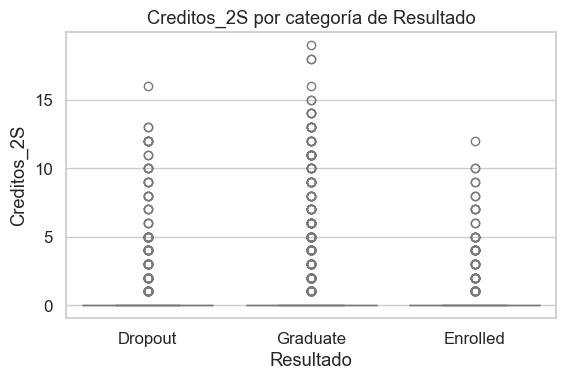


>>> Variable numérica: Sin_evaluar_2S


,count,mean,std,min,25%,50%,75%,max
Resultado,,,,,,,,
Dropout,1421.0,0.238,0.994,0.0,0.0,0.0,0.0,12.0
Enrolled,794.0,0.188,0.780,0.0,0.0,0.0,0.0,8.0
Graduate,2209.0,0.081,0.523,0.0,0.0,0.0,0.0,12.0


ANOVA F = 20.186, p-value = 0.00000


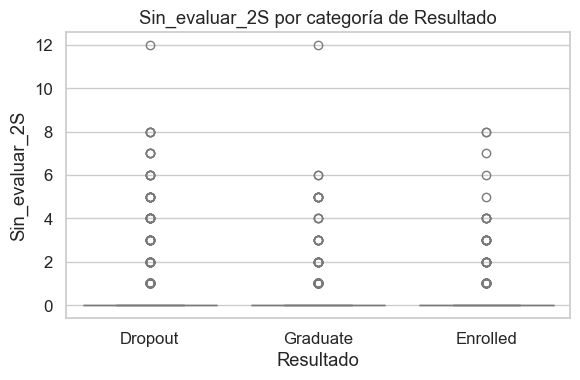


>>> Variable numérica: Tasa_desempleo


,count,mean,std,min,25%,50%,75%,max
Resultado,,,,,,,,
Dropout,1421.0,11.616,2.768,7.6,9.4,11.1,13.9,16.2
Enrolled,794.0,11.273,2.628,7.6,9.4,11.1,12.7,16.2
Graduate,2209.0,11.639,2.601,7.6,9.4,11.1,13.9,16.2


ANOVA F = 5.923, p-value = 0.00270


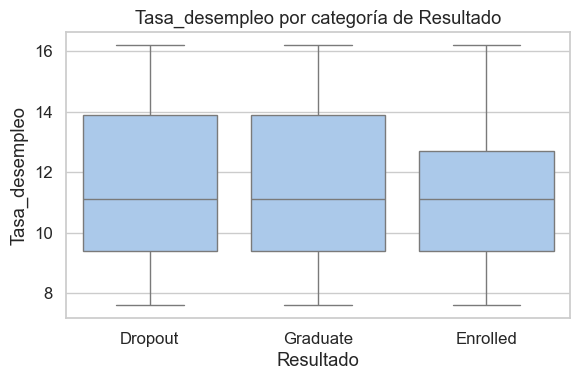


>>> Variable numérica: Tasa_inflación


,count,mean,std,min,25%,50%,75%,max
Resultado,,,,,,,,
Dropout,1421.0,1.284,1.405,-0.8,0.3,1.4,2.6,3.7
Enrolled,794.0,1.212,1.373,-0.8,0.3,1.4,2.6,3.7
Graduate,2209.0,1.198,1.371,-0.8,0.3,0.6,2.6,3.7


ANOVA F = 1.742, p-value = 0.17529


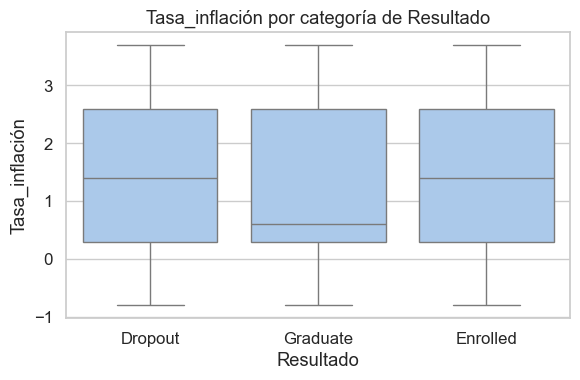


>>> Variable numérica: PIB


,count,mean,std,min,25%,50%,75%,max
Resultado,,,,,,,,
Dropout,1421.0,-0.151,2.252,-4.06,-1.7,0.32,1.74,3.51
Enrolled,794.0,0.053,2.316,-4.06,-1.7,0.32,1.79,3.51
Graduate,2209.0,0.082,2.261,-4.06,-1.7,0.79,1.79,3.51


ANOVA F = 4.799, p-value = 0.00828


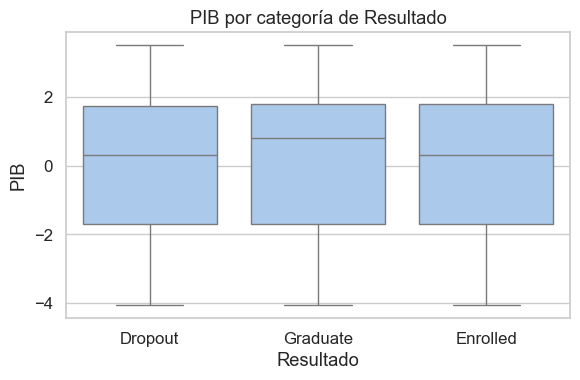

In [15]:
# Volvemos a identificar las variables con baja correlación respecto al target
umbral_baja = 0.1
bajas = [c for c in matriz.columns if c != target and matriz.loc[c, target] < umbral_baja]

# Separar bajas numéricas y categóricas según tu diccionario 'variables'
bajas_num = [c for c in bajas if c in variables['cuantitativas']]
bajas_cat = [c for c in bajas if c in variables['categoricas'] and c != target]

print("Variables con baja correlación numéricas:", bajas_num)
print("Variables con baja correlación categóricas:", bajas_cat)

# ================================
# 1.1 BIVARIADO: numéricas vs Resultado
# ================================
print("\n===== Análisis bivariado: numéricas vs Resultado =====")

for col in bajas_num:
    print(f"\n>>> Variable numérica: {col}")

    # Estadísticos descriptivos por clase de Resultado
    display(
        predict_students
        .groupby(target)[col]
        .describe()
        .round(3)
    )

    # ANOVA simple para ver si hay diferencias de medias
    grupos = [
        predict_students[predict_students[target] == clase][col].dropna()
        for clase in predict_students[target].unique()
    ]

    # Solo si hay al menos 2 grupos con datos
    grupos_validos = [g for g in grupos if len(g) > 0]
    if len(grupos_validos) > 1:
        F, p = f_oneway(*grupos_validos)
        print(f"ANOVA F = {F:.3f}, p-value = {p:.5f}")
    else:
        print("ANOVA no calculado: insuficientes datos por grupo.")

    # Boxplot para visualizar
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=predict_students[target], y=predict_students[col])
    plt.title(f"{col} por categoría de {target}")
    plt.tight_layout()
    plt.show()

In [16]:
print("\n===== Análisis bivariado: categóricas vs Resultado =====")

for col in bajas_cat:
    print(f"\n>>> Variable categórica: {col}")

    # Tabla de proporciones por categoría
    tabla_prop = pd.crosstab(
        predict_students[col],
        predict_students[target],
        normalize="index"
    ).round(3)

    print("Distribución de Resultado dentro de cada categoría:")
    display(tabla_prop)

    # Chi-cuadrado para asociación
    tabla_abs = pd.crosstab(predict_students[col], predict_students[target])
    chi2, p, dof, expected = chi2_contingency(tabla_abs)
    print(f"Chi-cuadrado = {chi2:.3f}, p-value = {p:.5f}, gl = {dof}")


===== Análisis bivariado: categóricas vs Resultado =====

>>> Variable categórica: Estado_civil
Distribución de Resultado dentro de cada categoría:


Resultado,Dropout,Enrolled,Graduate
Estado_civil,,,
1,0.302,0.184,0.514
2,0.472,0.137,0.391
3,0.250,0.500,0.250
4,0.462,0.176,0.363
5,0.440,0.120,0.440
6,0.667,0.167,0.167


Chi-cuadrado = 63.439, p-value = 0.00000, gl = 10

>>> Variable categórica: Orden_postulación
Distribución de Resultado dentro de cada categoría:


Resultado,Dropout,Enrolled,Graduate
Orden_postulación,,,
0,0.000,0.000,1.000
1,0.348,0.187,0.465
2,0.274,0.176,0.550
3,0.246,0.194,0.560
4,0.233,0.124,0.643
5,0.344,0.162,0.494
6,0.226,0.117,0.657
9,0.000,1.000,0.000


Chi-cuadrado = 69.609, p-value = 0.00000, gl = 14

>>> Variable categórica: Turno_estudio
Distribución de Resultado dentro de cada categoría:


Resultado,Dropout,Enrolled,Graduate
Turno_estudio,,,
0,0.429,0.155,0.416
1,0.308,0.182,0.510


Chi-cuadrado = 28.740, p-value = 0.00000, gl = 2

>>> Variable categórica: Nacionalidad
Distribución de Resultado dentro de cada categoría:


Resultado,Dropout,Enrolled,Graduate
Nacionalidad,,,
1,0.322,0.178,0.500
2,0.000,0.000,1.000
6,0.308,0.385,0.308
11,0.000,0.000,1.000
13,0.000,0.000,1.000
14,0.000,0.000,1.000
17,1.000,0.000,0.000
21,0.500,0.500,0.000
22,0.308,0.077,0.615


Chi-cuadrado = 45.858, p-value = 0.24223, gl = 40

>>> Variable categórica: Necesidades_especiales
Distribución de Resultado dentro de cada categoría:


Resultado,Dropout,Enrolled,Graduate
Necesidades_especiales,,,
0,0.321,0.179,0.500
1,0.333,0.216,0.451


Chi-cuadrado = 0.642, p-value = 0.72540, gl = 2

>>> Variable categórica: Estudiante_internacional
Distribución de Resultado dentro de cada categoría:


Resultado,Dropout,Enrolled,Graduate
Estudiante_internacional,,,
0,0.322,0.178,0.500
1,0.291,0.218,0.491


Chi-cuadrado = 1.280, p-value = 0.52731, gl = 2


Después del análisis de correlaciones mixtas, se realizó un análisis bivariado para evaluar la relación individual entre cada variable y la variable objetivo. Para las variables numéricas se aplicó la prueba ANOVA, y para las categóricas la prueba de chi-cuadrado, utilizando el estadístico p-value como criterio de decisión. En este contexto, las variables con p-value menor o igual a 0.05 se consideran estadísticamente asociadas al resultado, por lo que deben mantenerse en el modelo.
En cambio, las variables que mostraron p-value mayor a 0.05, y que además carecen de sustento teórico fuerte, fueron clasificadas como candidatas a eliminación. Bajo este criterio, y excluyendo desde el inicio todas las variables del segundo semestre (por generar data leakage), las variables a remover son: Estudiante_internacional, Necesidades_especiales, Nacionalidad y Tasa_inflación, dado que no evidencian una asociación significativa con la variable objetivo en el análisis bivariado.

---

# Fase de preparacion de datos

En esta fase se divide el dataset en dos momentos de predicción con el fin de evitar data leakage y garantizar que los modelos utilicen únicamente la información que estaría disponible en un contexto real de seguimiento estudiantil.
El Momento 0 (M0) corresponde a las variables conocidas al momento de la matrícula del estudiante, antes de iniciar el primer semestre, por lo que permite una predicción temprana del riesgo de deserción.
El Momento 1 (M1) incorpora además el rendimiento académico del primer semestre, lo que posibilita una estimación actualizada del riesgo una vez concluido dicho periodo.
No se consideran variables del segundo semestre, ya que su inclusión generaría fuga temporal de información debido a que reflejan comportamientos posteriores al posible abandono.

In [17]:
vars_M0 = [
    "Estado_civil",
    "Modo_ingreso",
    "Orden_postulación",
    "Carrera",
    "Turno_estudio",
    "Formación_previa",
    "Nota_formación_previa",
    "Nacionalidad",
    "Formación_madre",
    "Formación_padre",
    "Ocupación_madre",
    "Ocupación_padre",
    "Nota_admisión",
    "Desplazado",
    "Necesidades_especiales",
    "Deudor",
    "Pagos_al_día",
    "Género",
    "Becado",
    "Edad_matrícula",
    "Estudiante_internacional",
    "Tasa_desempleo",
    "Tasa_inflación",
    "PIB"
]

vars_M1 = vars_M0 + [
    "Creditos_1S",
    "Matriculadas_1S",
    "Evaluaciones_1S",
    "Aprobadas_1S",
    "Nota_promedio_1S",
    "Sin_evaluar_1S"
]

In [18]:
cols_df = set(predict_students.columns)

vars_M0_final = [c for c in vars_M0 if c in cols_df]
vars_M1_final = [c for c in vars_M1 if c in cols_df]

In [19]:
df_M0 = predict_students[vars_M0_final + ["Resultado"]].copy()
df_M1 = predict_students[vars_M1_final + ["Resultado"]].copy()

In [20]:
variables_a_eliminar = [
    "Estudiante_internacional",
    "Necesidades_especiales",
    "Nacionalidad",
    "Tasa_inflación",
    "Turno_estudio"
]

In [21]:
# Filtrar solo las que realmente existen en los dataframes
vars_drop_M0 = [v for v in variables_a_eliminar if v in df_M0.columns]
vars_drop_M1 = [v for v in variables_a_eliminar if v in df_M1.columns]

# Eliminar en ambos conjuntos
df_M0 = df_M0.drop(columns=vars_drop_M0)
df_M1 = df_M1.drop(columns=vars_drop_M1)

print("Variables eliminadas en M0:", vars_drop_M0)
print("Variables eliminadas en M1:", vars_drop_M1)

print("Shape final M0:", df_M0.shape)
print("Shape final M1:", df_M1.shape)

Variables eliminadas en M0: ['Estudiante_internacional', 'Necesidades_especiales', 'Nacionalidad', 'Tasa_inflación', 'Turno_estudio']
Variables eliminadas en M1: ['Estudiante_internacional', 'Necesidades_especiales', 'Nacionalidad', 'Tasa_inflación', 'Turno_estudio']
Shape final M0: (4424, 20)
Shape final M1: (4424, 26)


In [22]:
variables_0 = {

    "categoricas": [
        "Estado_civil",
        "Modo_ingreso",
        "Orden_postulación",
        "Carrera",
        "Formación_previa",
        "Formación_madre",
        "Formación_padre",
        "Ocupación_madre",
        "Ocupación_padre",
        "Desplazado",
        "Deudor",
        "Pagos_al_día",
        "Género",
        "Becado"
    ],

    "cuantitativas": [
        "Nota_formación_previa",
        "Nota_admisión",
        "Edad_matrícula",
        "Tasa_desempleo",
        "PIB",
    ]
}

variables_1 = {

    "categoricas": [
        "Estado_civil",
        "Modo_ingreso",
        "Orden_postulación",
        "Carrera",
        "Formación_previa",
        "Formación_madre",
        "Formación_padre",
        "Ocupación_madre",
        "Ocupación_padre",
        "Desplazado",
        "Deudor",
        "Pagos_al_día",
        "Género",
        "Becado"
    ],

    "cuantitativas": [
        "Nota_formación_previa",
        "Nota_admisión",
        "Edad_matrícula",
        "Tasa_desempleo",
        "PIB",
        "Creditos_1S",
        "Matriculadas_1S",
        "Evaluaciones_1S",
        "Aprobadas_1S",
        "Nota_promedio_1S",
        "Sin_evaluar_1S"
    ]
}



###  15. Detección y eliminación de valores atípicos (Outliers)

Para el tratamiento de valores atípicos se optó por un enfoque basado en criterios del dominio educativo, en lugar de aplicar reglas automáticas como el método del IQR que tienden a eliminar casos válidos sin fundamento contextual. En particular, se identificó que un grupo reducido de estudiantes presentaba edades superiores a 40 años. Aunque estos casos pueden ser reales, corresponden típicamente a perfiles no representativos del modelo institucional de deserción (segunda carrera, estudiantes de educación continua o reincorporaciones tardías). Dado que el objetivo del modelo es predecir el comportamiento del estudiante regular de pregrado, cuyo rango etario predominante se encuentra entre los 17 y 30 años, se decidió filtrar únicamente los registros con Edad_matrícula > 40, manteniendo la coherencia del conjunto de entrenamiento y evitando sesgos derivados de poblaciones marginales que no forman parte del público objetivo.

In [23]:
def filtrar_mayores(df, columna="Edad_matrícula", limite=40, mostrar=True):
    df_filtrado = df.copy()
    total_inicial = df_filtrado.shape[0]

    # Filtrar edad <= límite
    df_filtrado = df_filtrado[df_filtrado[columna] <= limite]

    total_final = df_filtrado.shape[0]
    eliminados = total_inicial - total_final

    if mostrar:
        print(f"\nFiltro aplicado sobre '{columna}' (<= {limite} años)")
        print(f"  - Registros iniciales: {total_inicial}")
        print(f"  - Registros finales: {total_final}")
        print(f"  - Registros eliminados: {eliminados} ({eliminados/total_inicial:.2%})")

    return df_filtrado



In [24]:
print("\nAplicando filtro de edad a df_M0...")
df_M0 = filtrar_mayores(df_M0, "Edad_matrícula")

print("\nAplicando filtro de edad a df_M1...")
df_M1 = filtrar_mayores(df_M1, "Edad_matrícula")

print("\nShapes después del filtrado:")
print("df_M0:", df_M0.shape)
print("df_M1:", df_M1.shape)



Aplicando filtro de edad a df_M0...

Filtro aplicado sobre 'Edad_matrícula' (<= 40 años)
  - Registros iniciales: 4424
  - Registros finales: 4199
  - Registros eliminados: 225 (5.09%)

Aplicando filtro de edad a df_M1...

Filtro aplicado sobre 'Edad_matrícula' (<= 40 años)
  - Registros iniciales: 4424
  - Registros finales: 4199
  - Registros eliminados: 225 (5.09%)

Shapes después del filtrado:
df_M0: (4199, 20)
df_M1: (4199, 26)


###  11. Segmentación de la variable "Modo_ingreso"


La agrupación de códigos de “Modo_ingreso” en segmentos busca simplificar y dar coherencia analítica a la variable, ya que varios códigos representan formas de acceso equivalentes (por ejemplo, distintas fases del contingente general o distintos decretos con el mismo fin). Al combinar estos códigos en categorías amplias como General_contingent, Especial_regiones o Acceso_por_titulacion, se reducen la complejidad y la dispersión de datos, se evita que existan categorías con pocos casos, y se mejora la estabilidad estadística y la interpretabilidad de los resultados.

In [25]:
# Agrupación de códigos de Modo_ingreso por segmento ---
segmentos = {
    "General_contingent":       [1, 17, 18],
    "Especial_regiones":        [5, 16],
    "Ordenanzas_especiales":    [2, 10, 26, 27],
    "Acceso_por_titulacion":    [7, 44, 53],
    "Movilidad_cambios":        [42, 43, 51, 57],
    "Mayores_23":               [39],
    "Internacional":            [15]
}

# Diccionario que relaciona cada código numérico con su segmento
def cod_a_segmento(segmentos):
    cod_segmento = {cod: seg for seg, lista in segmentos.items() for cod in lista}
    return cod_segmento

modo_ingreso_seg = cod_a_segmento(segmentos)

df_M0["Modo_ingreso"] = df_M0["Modo_ingreso"].map(modo_ingreso_seg).fillna("Otro")
df_M1["Modo_ingreso"] = df_M1["Modo_ingreso"].map(modo_ingreso_seg).fillna("Otro")

print("Valores únicos M0:", df_M0["Modo_ingreso"].unique())
print("Valores únicos M1:", df_M1["Modo_ingreso"].unique())

Valores únicos M0: ['General_contingent' 'Internacional' 'Acceso_por_titulacion'
 'Movilidad_cambios' 'Mayores_23' 'Especial_regiones'
 'Ordenanzas_especiales']
Valores únicos M1: ['General_contingent' 'Internacional' 'Acceso_por_titulacion'
 'Movilidad_cambios' 'Mayores_23' 'Especial_regiones'
 'Ordenanzas_especiales']


Variable Modo_ingreso:

- Antes: era un código numérico (1, 2, 3, …, 57) sin significado directo.
- Ahora: se agrupa en 7 grandes categorías:
- General_contingent – ingreso regular por examen general.
- Especial_regiones – ingreso mediante cupos especiales por región.
- Ordenanzas_especiales – ingreso por disposiciones internas.
- Acceso_por_titulacion – ingreso por poseer título o grado previo.
- Movilidad_cambios – ingreso por traslado o intercambio.
- Mayores_23 – postulantes mayores de 23 años.
- Internacional – estudiantes extranjeros o con convenio internacional.

---

###  Segmentación de la variable "Formación_previa"

In [26]:
# Agrupación de la variable Formación_previa
segmentos = {
    "Basica_Secundaria": [1, 14, 19, 38],        # Educación básica o secundaria completa
    "No_Completada":     [9, 10, 12, 15],        # Secundaria o estudios no concluidos
    "Superior":          [2, 3, 4, 5, 6, 39, 40, 42, 43]  # Educación superior (técnica o universitaria)
}

# Aplicación del mapeo
estudios_previos = cod_a_segmento(segmentos)

df_M0["Formación_previa"] = df_M0["Formación_previa"].map(estudios_previos).fillna("Otro")
df_M1["Formación_previa"] = df_M1["Formación_previa"].map(estudios_previos).fillna("Otro")
print("Valores únicos M0:", df_M0["Formación_previa"].unique())
print("Valores únicos M1:", df_M1["Formación_previa"].unique())

Valores únicos M0: ['Basica_Secundaria' 'Superior' 'No_Completada']
Valores únicos M1: ['Basica_Secundaria' 'Superior' 'No_Completada']


---

###  13. Segmentación de las variables "Formación_madre" y "Formación_padre"

In [27]:
# Definición de segmentos educativos
segmentos = {
    # Educación básica (Primaria y 1.º–3.º Ciclo)
    "Basica": [35, 36, 37, 38, 19, 26, 27, 30, 29],

    # Educación secundaria (Ensino Secundário / cursos técnicos-medios)
    "Secundaria": [1, 9, 10, 11, 12, 14, 18, 22],

    # Educación superior (Universitaria o equivalente)
    "Superior": [2, 3, 4, 5, 6, 39, 40, 41, 42, 43, 44],

    # Desconocido / No especificado
    "Desconocido": [34]
}

# Reutilización de la función cod_a_segmento definida antes ---
estudios_previos = cod_a_segmento(segmentos)


df_M0["Formación_madre"] = df_M0["Formación_madre"].map(estudios_previos).fillna("Otro")
df_M1["Formación_madre"] = df_M1["Formación_madre"].map(estudios_previos).fillna("Otro")

print("Valores únicos M0:", df_M0["Formación_madre"].unique())
print("Valores únicos M1:", df_M1["Formación_madre"].unique())

Valores únicos M0: ['Basica' 'Secundaria' 'Superior' 'Desconocido']
Valores únicos M1: ['Basica' 'Secundaria' 'Superior' 'Desconocido']


In [28]:
# Definición de segmentos educativos
segmentos = {
    # Educación básica (Primaria y 1.º–3.º Ciclo)
    "Basica": [35, 36, 37, 38, 19, 26, 27, 29, 30],

    # Educación secundaria (Ensino Secundário / cursos técnicos o comerciales)
    "Secundaria": [1, 9, 10, 11, 12, 13, 14, 18, 20, 22, 25, 31, 33],

    # Educación superior (Universitaria o equivalente)
    "Superior": [2, 3, 4, 5, 6, 39, 40, 41, 42, 43, 44],

    # Desconocido / No especificado
    "Desconocido": [34]
}


# Reutilización de la función cod_a_segmento definida antes ---
estudios_previos = cod_a_segmento(segmentos)

df_M0["Formación_padre"] = df_M0["Formación_padre"].map(estudios_previos).fillna("Otro")
df_M1["Formación_padre"] = df_M1["Formación_padre"].map(estudios_previos).fillna("Otro")

print("Valores únicos M0:", df_M0["Formación_padre"].unique())
print("Valores únicos M1:", df_M1["Formación_padre"].unique())

Valores únicos M0: ['Secundaria' 'Superior' 'Basica' 'Desconocido']
Valores únicos M1: ['Secundaria' 'Superior' 'Basica' 'Desconocido']


###  14. Segmentación de las variables “Ocupación_madre” y “Ocupación_padre”

In [29]:
segmentos = {
    # Alta dirección y profesiones intelectuales
    "Alta_direccion_profesiones_intelectuales": [1, 2, 122, 123, 125],

    # écnicos y profesionales de nivel medio / administrativos
    "Tecnicos_profesionales_nivel_medio": [3, 4, 131, 132, 134, 141, 143, 144],

    # Servicios, ventas y oficios cualificados
    "Servicios_ventas_oficios": [5, 6, 7, 8, 151, 152, 153, 171, 173, 175],

    # Trabajadores no cualificados
    "Trabajadores_no_cualificados": [9, 191, 192, 193, 194],

    # Otras situaciones / no clasificadas
    "Otras_situaciones_no_clasificadas": [0, 10, 90, 99]
}


ocupacion_madre = cod_a_segmento(segmentos)

df_M0["Ocupación_madre"] = df_M0["Ocupación_madre"].map(ocupacion_madre).fillna("Otro")
df_M1["Ocupación_madre"] = df_M1["Ocupación_madre"].map(ocupacion_madre).fillna("Otro")

print("Valores únicos M0:", df_M0["Ocupación_madre"].unique())
print("Valores únicos M1:", df_M1["Ocupación_madre"].unique())

Valores únicos M0: ['Servicios_ventas_oficios' 'Tecnicos_profesionales_nivel_medio'
 'Trabajadores_no_cualificados' 'Alta_direccion_profesiones_intelectuales'
 'Otras_situaciones_no_clasificadas']
Valores únicos M1: ['Servicios_ventas_oficios' 'Tecnicos_profesionales_nivel_medio'
 'Trabajadores_no_cualificados' 'Alta_direccion_profesiones_intelectuales'
 'Otras_situaciones_no_clasificadas']


In [30]:
segmentos = {
    # 1Alta dirección y profesiones intelectuales
    "Alta_direccion_profesiones_intelectuales": [
        1, 2, 112, 114, 121, 122, 123, 124
    ],

    # Técnicos y profesionales de nivel medio / administrativos
    "Tecnicos_profesionales_nivel_medio": [
        3, 4, 131, 132, 134, 135, 141, 143, 144
    ],

    # Servicios, ventas y oficios cualificados
    "Servicios_ventas_oficios": [
        5, 6, 7, 8, 151, 152, 153, 154, 161, 163,
        171, 172, 174, 175, 181, 182, 183
    ],

    # Trabajadores no cualificados
    "Trabajadores_no_cualificados": [
        9, 192, 193, 194, 195
    ],

    # Otras situaciones / no clasificadas
    "Otras_situaciones_no_clasificadas": [
        0, 10, 90, 99, 101, 102, 103
    ]
}

ocupacion_padre = cod_a_segmento(segmentos)

df_M0["Ocupación_padre"] = df_M0["Ocupación_padre"].map(ocupacion_padre).fillna("Otro")
df_M1["Ocupación_padre"] = df_M1["Ocupación_padre"].map(ocupacion_padre).fillna("Otro")

print("Valores únicos M0:", df_M0["Ocupación_padre"].unique())
print("Valores únicos M1:", df_M1["Ocupación_padre"].unique())

Valores únicos M0: ['Trabajadores_no_cualificados' 'Tecnicos_profesionales_nivel_medio'
 'Otras_situaciones_no_clasificadas' 'Servicios_ventas_oficios'
 'Alta_direccion_profesiones_intelectuales']
Valores únicos M1: ['Trabajadores_no_cualificados' 'Tecnicos_profesionales_nivel_medio'
 'Otras_situaciones_no_clasificadas' 'Servicios_ventas_oficios'
 'Alta_direccion_profesiones_intelectuales']


### 19. Codificacion de variables ordinales

In [31]:
categoricas_ordinal = [
    "Formación_previa",
    "Formación_madre",
    "Formación_padre",
    "Ocupación_madre",
    "Ocupación_padre"
]


orden_educacion_previa = [["No_Completada", "Basica_Secundaria", "Superior"]]
orden_educacion_padres = [["Desconocido", "Basica", "Secundaria", "Superior"]]
orden_ocupacion = [[
    "Otras_situaciones_no_clasificadas",
    "Trabajadores_no_cualificados",
    "Servicios_ventas_oficios",
    "Tecnicos_profesionales_nivel_medio",
    "Alta_direccion_profesiones_intelectuales"
]]

# Crear un diccionario para simplificar
ordinales = {
    "Formación_previa":orden_educacion_previa,
    "Formación_madre": orden_educacion_padres,
    "Formación_padre": orden_educacion_padres,
    "Ocupación_madre": orden_ocupacion,
    "Ocupación_padre": orden_ocupacion
}

In [32]:
def aplicar_ordinal(df, ordinales_dict):
    """
    Aplica OrdinalEncoder con órdenes específicos a las columnas indicadas
    y elimina las filas donde aparezca -1 (categoría desconocida o missing).
    """
    df_encoded = df.copy()

    # Solo columnas ordinales que existan en este df
    cols_ordinal = [c for c in ordinales_dict.keys() if c in df_encoded.columns]
    if not cols_ordinal:
        return df_encoded  # nada que codificar

    # Asegurar tipo string
    df_encoded[cols_ordinal] = df_encoded[cols_ordinal].astype("string")

    # Codificar cada columna con su orden correspondiente
    for col in cols_ordinal:
        orden = ordinales_dict[col]
        encoder = OrdinalEncoder(
            categories=orden,
            handle_unknown="use_encoded_value",
            unknown_value=-1,
            encoded_missing_value=-1
        )
        df_encoded[[col]] = encoder.fit_transform(df_encoded[[col]])

    # Eliminar filas con -1 en alguna columna ordinal
    mascara_validos = ~(df_encoded[cols_ordinal] == -1).any(axis=1)
    eliminados = (~mascara_validos).sum()

    print(f"\nAplicando codificación ordinal en: {cols_ordinal}")
    print(f"  - Filas iniciales: {df.shape[0]}")
    print(f"  - Filas eliminadas por categorías desconocidas/missing: {eliminados}")
    print(f"  - Filas finales: {mascara_validos.sum()}")

    df_encoded = df_encoded[mascara_validos].copy()
    return df_encoded

In [33]:
df_M0 = aplicar_ordinal(df_M0, ordinales)
df_M1 = aplicar_ordinal(df_M1, ordinales)

print("Después de ordinal:")
print("df_M0:", df_M0.shape)
print("df_M1:", df_M1.shape)


Aplicando codificación ordinal en: ['Formación_previa', 'Formación_madre', 'Formación_padre', 'Ocupación_madre', 'Ocupación_padre']
  - Filas iniciales: 4199
  - Filas eliminadas por categorías desconocidas/missing: 0
  - Filas finales: 4199

Aplicando codificación ordinal en: ['Formación_previa', 'Formación_madre', 'Formación_padre', 'Ocupación_madre', 'Ocupación_padre']
  - Filas iniciales: 4199
  - Filas eliminadas por categorías desconocidas/missing: 0
  - Filas finales: 4199
Después de ordinal:
df_M0: (4199, 20)
df_M1: (4199, 26)


###  20. Split

In [34]:
def split_M(df, target="Resultado", test_size=0.2, random_state=42):
    X = df.drop(columns=[target])
    y = df[target].copy()
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        stratify=y
    )
    return X_train, X_test, y_train, y_test

def escalar_train_test(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled  = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, scaler

In [35]:
# Momento 1
X_M1_train, X_M1_test, y_M1_train, y_M1_test = split_M(df_M1)

# Momento 0 (si también lo trabajas)
X_M0_train, X_M0_test, y_M0_train, y_M0_test = split_M(df_M0)


Se realizó primero la partición en entrenamiento y prueba para evitar data leakage. El One-Hot Encoding se ajustara únicamente con los datos de entrenamiento, garantizando que el modelo no aprenda categorías provenientes del conjunto de prueba y mantenga una transformación coherente y realista.

###  21. Codificación de variables categóricas nominales (One-Hot Encoding)


Con el fin de preparar los datos para los modelos de aprendizaje automático, se realizó la transformación de las variables categóricas mediante One-Hot Encoding (OHE). Esta técnica permite convertir categorías nominales en variables binarias, evitando la introducción de relaciones ordinales inexistentes y mejorando la capacidad de los algoritmos para interpretar dichas variables.

Para esta codificación se definió un conjunto específico de columnas categóricas que requieren transformación, entre las cuales se encuentran:
Modo_ingreso, Deudor, Pagos_al_día, Género, Becado y Carrera.
Estas variables fueron previamente limpiadas y reagrupadas en categorías consistentes (por ejemplo, la segmentación manual del campo Modo_ingreso).

In [36]:
# Agrupamos las categoricas solo para hacer el one hot encoding
categoricas_onehot = [
    "Modo_ingreso",
    "Deudor",
    "Pagos_al_día",
    "Género",
    "Becado",
    "Carrera"
]

def onehot_fit_transform(X_train, X_test, categoricas=categoricas_onehot):
    # columnas categóricas que realmente existen
    cats_existentes = [c for c in categoricas if c in X_train.columns]
    num_cols = [c for c in X_train.columns if c not in cats_existentes]

    onehot = OneHotEncoder(
        drop='first',
        sparse_output=False,
        handle_unknown='ignore'
    )

    preprocessor = ColumnTransformer(
        transformers=[('onehot', onehot, cats_existentes)],
        remainder='passthrough'
    )

    # fit SOLO en train
    X_train_trans = preprocessor.fit_transform(X_train)
    X_test_trans  = preprocessor.transform(X_test)

    # nombres columnas
    onehot_cols = preprocessor.named_transformers_['onehot'].get_feature_names_out(cats_existentes)
    final_numeric_cols = num_cols
    colnames = list(onehot_cols) + final_numeric_cols

    X_train_df = pd.DataFrame(X_train_trans, columns=colnames, index=X_train.index)
    X_test_df  = pd.DataFrame(X_test_trans,  columns=colnames, index=X_test.index)

    X_train_df.columns = X_train_df.columns.str.replace('onehot__', '', regex=False)
    X_test_df.columns  = X_test_df.columns.str.replace('onehot__', '', regex=False)

    return X_train_df, X_test_df, preprocessor


In [37]:
# Momento 1
X_M1_train_enc, X_M1_test_enc, preprocessor_M1 = onehot_fit_transform(X_M1_train, X_M1_test)

# Momento 0 (si lo modelas también)
X_M0_train_enc, X_M0_test_enc, preprocessor_M0 = onehot_fit_transform(X_M0_train, X_M0_test)



In [38]:
X_M0_train_scaled, X_M0_test_scaled, scaler_M0 = escalar_train_test(
    X_M0_train_enc,
    X_M0_test_enc
)

X_M1_train_scaled, X_M1_test_scaled, scaler_M1 = escalar_train_test(
    X_M1_train_enc,
    X_M1_test_enc
)

###  23. Verificación de la estructura del DataFrame final

In [39]:
display(X_M0_train_scaled)
display(X_M1_train_scaled)

array([[-0.11116133,  0.74359649, -0.08483161, ..., -0.37854445,
         0.31585926,  0.79123164],
       [-0.11116133,  0.74359649, -0.08483161, ..., -0.75799262,
        -0.8161654 , -1.38521127],
       [-0.11116133, -1.34481539, -0.08483161, ...,  3.03648908,
        -1.49538019,  0.13962857],
       ...,
       [-0.11116133,  0.74359649, -0.08483161, ..., -0.75799262,
        -0.8161654 , -1.38521127],
       [-0.11116133,  0.74359649, -0.08483161, ..., -0.75799262,
        -0.17468476,  0.89318314],
       [-0.11116133, -1.34481539, -0.08483161, ...,  3.22621317,
        -0.17468476,  0.89318314]], shape=(3359, 39))

array([[-0.11116133,  0.74359649, -0.08483161, ...,  0.43626657,
         0.41778683, -0.20285755],
       [-0.11116133,  0.74359649, -0.08483161, ...,  0.10479871,
         1.14112469,  2.84590532],
       [-0.11116133, -1.34481539, -0.08483161, ..., -0.88960488,
        -0.04614711, -0.20285755],
       ...,
       [-0.11116133,  0.74359649, -0.08483161, ...,  1.0992023 ,
         0.6622875 , -0.20285755],
       [-0.11116133,  0.74359649, -0.08483161, ..., -1.5525406 ,
        -2.24609191, -0.20285755],
       [-0.11116133, -1.34481539, -0.08483161, ..., -0.22666915,
         0.11099181, -0.20285755]], shape=(3359, 45))

## Aplicar SMOTE

In [40]:
smo_M0 = SMOTE(random_state=42)

X_M0_train_sm, y_M0_train_sm = smo_M0.fit_resample(
    X_M0_train_scaled,
    y_M0_train
)

print("Distribución original:")
print(y_M0_train.value_counts())
print("\nDistribución con SMOTE:")
print(pd.Series(y_M0_train_sm).value_counts())


Distribución original:
Resultado
Graduate    1699
Dropout     1046
Enrolled     614
Name: count, dtype: int64

Distribución con SMOTE:
Resultado
Enrolled    1699
Graduate    1699
Dropout     1699
Name: count, dtype: int64


In [41]:
smo_M1 = SMOTE(random_state=42)

X_M1_train_sm, y_M1_train_sm = smo_M1.fit_resample(
    X_M1_train_scaled,
    y_M1_train
)

print("Distribución original:")
print(y_M1_train.value_counts())
print("\nDistribución con SMOTE:")
print(pd.Series(y_M1_train_sm).value_counts())

Distribución original:
Resultado
Graduate    1699
Dropout     1046
Enrolled     614
Name: count, dtype: int64

Distribución con SMOTE:
Resultado
Enrolled    1699
Graduate    1699
Dropout     1699
Name: count, dtype: int64


###  24. Análisis de multicolinealidad (VIF)

In [42]:
X_M0_train_sm = pd.DataFrame(X_M0_train_sm, columns=X_M0_train_enc.columns)
X_M1_train_sm = pd.DataFrame(X_M1_train_sm, columns=X_M1_train_enc.columns)


In [43]:
# Escalar solo las numéricas
var_num = X_M0_train_sm

# Calcular VIF con las variables escaladas
vif_df = pd.DataFrame({
    "Variable": var_num.columns,
    "VIF": [variance_inflation_factor(var_num, i) for i in range(var_num.shape[1])]
}).sort_values("VIF", ascending=False).reset_index(drop=True)

vif_df


,Variable,VIF
0,Carrera_9500,50.041643
1,Carrera_9147,34.675705
2,Carrera_9085,26.714947
3,Carrera_9238,25.959512
4,Carrera_9773,24.769271
5,Carrera_9991,24.366007
6,Carrera_9853,21.173081
7,Carrera_9670,21.062094
8,Carrera_9254,20.222730
9,Carrera_9119,19.679598


In [44]:
columnas_a_eliminar = [
    "Carrera_9500",
    "Carrera_9147",
    "Carrera_9085",
    "Carrera_9238",
    "Carrera_9773",
    "Carrera_9991",
    "Carrera_9853",
    "Carrera_9670",
    "Carrera_9254",
    "Carrera_9119",
    "Carrera_171",
    "Carrera_9070",
    "Carrera_9003",
    "Carrera_9130",
    "Carrera_8014",
    "Modo_ingreso_General_contingent"
]

X_M0_train_sm = pd.DataFrame(
    X_M0_train_sm,
    columns=X_M0_train_enc.columns
).drop(columns=columnas_a_eliminar, errors='ignore')

X_M0_test_scaled = pd.DataFrame(
    X_M0_test_scaled,
    columns=X_M0_test_enc.columns
).drop(columns=columnas_a_eliminar, errors='ignore')


In [45]:
var_num = X_M1_train_sm

# Calcular VIF con las variables escaladas
vif_df = pd.DataFrame({
    "Variable": var_num.columns,
    "VIF": [variance_inflation_factor(var_num, i) for i in range(var_num.shape[1])]
}).sort_values("VIF", ascending=False).reset_index(drop=True)

vif_df

,Variable,VIF
0,Carrera_9500,50.155811
1,Carrera_9147,34.990828
2,Carrera_9085,26.916412
3,Carrera_9238,25.891033
4,Carrera_9773,24.873170
5,Carrera_9991,24.505725
6,Carrera_171,21.842119
7,Carrera_9670,21.134229
8,Carrera_9853,21.022329
9,Carrera_9254,20.205718


In [46]:
columnas_a_eliminar = [
    "Carrera_9500",
    "Carrera_9147",
    "Carrera_9085",
    "Carrera_9238",
    "Carrera_9773",
    "Carrera_9991",
    "Carrera_171",
    "Carrera_9670",
    "Carrera_9853",
    "Carrera_9254",
    "Carrera_9119",
    "Carrera_9070",
    "Carrera_9003",
    "Carrera_9130",
    "Carrera_8014",
    "Matriculadas_1S",
    "Modo_ingreso_General_contingent"
]
X_M1_train_sm = pd.DataFrame(
    X_M1_train_sm,
    columns=X_M1_train_enc.columns
).drop(columns=columnas_a_eliminar, errors='ignore')

X_M1_test_scaled = pd.DataFrame(
    X_M1_test_scaled,
    columns=X_M1_test_enc.columns
).drop(columns=columnas_a_eliminar, errors='ignore')


Al revisar el VIF posterior a la codificación One-Hot, se identificó que varias categorías específicas de la variable “Carrera” presentaban valores extremadamente altos de multicolinealidad.
Este comportamiento indica que dichas categorías aportan información redundante respecto a otras categorías de la misma variable o respecto a otras variables del modelo. Para reducir la complejidad dimensional y mejorar la estabilidad del modelo predictivo, se decidió eliminar estas categorías de manera controlada.
También se eliminó la categoría “Modo_ingreso_General_contingent” y la variable “Matriculadas_1S”, cuyo VIF superaba 10, indicando redundancia potencial con otras variables explicativas.

# Fase de modelado

###  26. Codificación de la variable objetivo

In [47]:
# y0 en enteros
le = LabelEncoder()
y_train_enc_0 = le.fit_transform(y_M0_train_sm)
y_test_enc_0  = le.transform(y_M0_test)

In [48]:
# y1 en enteros
le = LabelEncoder()
y_train_enc_1 = le.fit_transform(y_M1_train_sm)
y_test_enc_1  = le.transform(y_M1_test)

### Entrenamiento del modelo: KNN - 0

K=3 | Train: 0.8474 | CV mean: 0.6775 (+/- 0.0109)
K=5 | Train: 0.7789 | CV mean: 0.6400 (+/- 0.0157)
K=7 | Train: 0.7359 | CV mean: 0.6335 (+/- 0.0098)
K=9 | Train: 0.7159 | CV mean: 0.6217 (+/- 0.0109)
K=11 | Train: 0.6967 | CV mean: 0.6096 (+/- 0.0146)
K=13 | Train: 0.6851 | CV mean: 0.6108 (+/- 0.0159)
K=15 | Train: 0.6726 | CV mean: 0.6049 (+/- 0.0129)
K=17 | Train: 0.6622 | CV mean: 0.5996 (+/- 0.0153)
K=19 | Train: 0.6506 | CV mean: 0.5976 (+/- 0.0146)
K=21 | Train: 0.6451 | CV mean: 0.5935 (+/- 0.0143)
K=23 | Train: 0.6374 | CV mean: 0.5892 (+/- 0.0172)
K=25 | Train: 0.6323 | CV mean: 0.5805 (+/- 0.0187)
K=27 | Train: 0.6276 | CV mean: 0.5841 (+/- 0.0196)
K=29 | Train: 0.6182 | CV mean: 0.5811 (+/- 0.0182)

✅ K óptimo según validación cruzada: 3


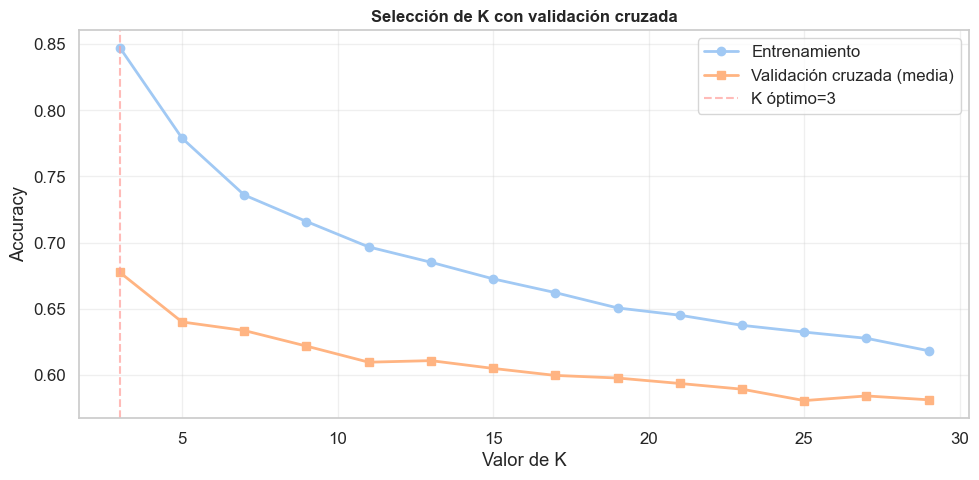

Modelo KNN entrenado con éxito.


In [49]:
# Si X_M0_train_sm no está escalado, escálalo antes y usa la versión escalada aquí
X_train_cv = X_M0_train_sm

k_values = range(3, 31, 2)  # solo impares
train_scores = []
cv_scores_mean = []
cv_scores_std = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

    # accuracy en TRAIN (sólo para ver sobreajuste)
    knn_temp.fit(X_train_cv, y_train_enc_0)
    train_acc = knn_temp.score(X_train_cv, y_train_enc_0)
    train_scores.append(train_acc)

    # validación cruzada SOLO en el train (NO usa test)
    cv_scores = cross_val_score(
        knn_temp,
        X_train_cv,
        y_train_enc_0,
        cv=cv,
        scoring='accuracy'
    )
    cv_scores_mean.append(cv_scores.mean())
    cv_scores_std.append(cv_scores.std())

    print(f"K={k} | Train: {train_acc:.4f} | CV mean: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# elegir K óptimo según el mejor promedio de CV
optimal_k = k_values[int(np.argmax(cv_scores_mean))]
print(f"\n✅ K óptimo según validación cruzada: {optimal_k}")

# Gráfico: entrenamiento vs validación cruzada
plt.figure(figsize=(10, 5))
plt.plot(k_values, train_scores, marker='o', label='Entrenamiento', linewidth=2)
plt.plot(k_values, cv_scores_mean, marker='s', label='Validación cruzada (media)', linewidth=2)
plt.axvline(x=optimal_k, color='r', linestyle='--', alpha=0.7, label=f'K óptimo={optimal_k}')
plt.xlabel('Valor de K')
plt.ylabel('Accuracy')
plt.title('Selección de K con validación cruzada', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Entrenar modelo final con K óptimo usando TODO el train balanceado
knn = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
knn.fit(X_train_cv, y_train_enc_0)
print("Modelo KNN entrenado con éxito.")


## Validación KNN - 0


[STAGE 5: ASSESS] - Evaluación del modelo - M0
--------------------------------------------------------------------------------

Accuracy Entrenamiento: 0.8474
Accuracy Prueba: 0.4988

Reporte de Clasificación:
              precision    recall  f1-score   support

     Dropout       0.49      0.56      0.53       261
    Enrolled       0.27      0.42      0.33       154
    Graduate       0.68      0.49      0.57       425

    accuracy                           0.50       840
   macro avg       0.48      0.49      0.48       840
weighted avg       0.55      0.50      0.51       840



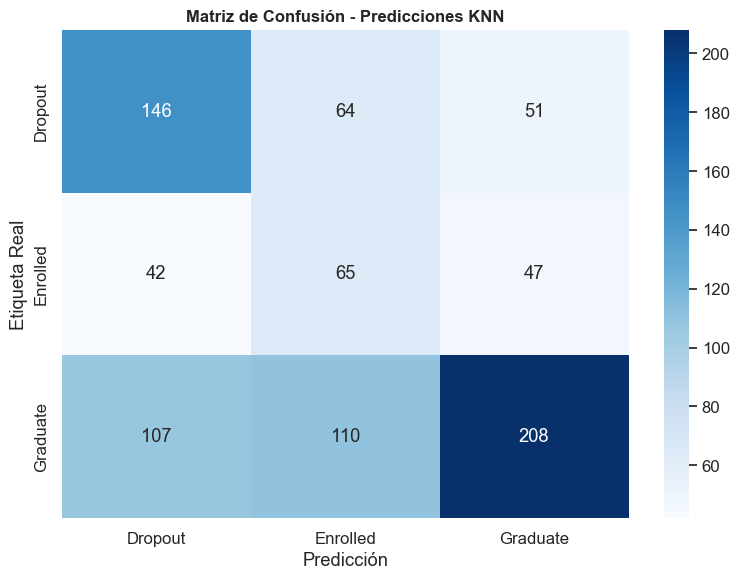

In [50]:
print("\n[STAGE 5: ASSESS] - Evaluación del modelo - M0")
print("-" * 80)

# Predicciones
y_train_pred = knn.predict(X_M0_train_sm)
y_test_pred = knn.predict(X_M0_test_scaled)

# Accuracy
accuracy_train = accuracy_score(y_train_enc_0, y_train_pred)
accuracy_test = accuracy_score(y_test_enc_0, y_test_pred)

print(f"\nAccuracy Entrenamiento: {accuracy_train:.4f}")
print(f"Accuracy Prueba: {accuracy_test:.4f}")

# ---- Clases reales ----
# Asegúrate de que estas son las 3 clases de tu problema
class_names = ['Dropout', 'Enrolled', 'Graduate']

print("\nReporte de Clasificación:")
print(classification_report(y_test_enc_0, y_test_pred, target_names=class_names))

# Matriz de Confusión
cm = confusion_matrix(y_test_enc_0, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.ylabel('Etiqueta Real')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión - Predicciones KNN', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

## Entrenamiento del modelo KNN - 1

K=3 | Train: 0.8866 | CV mean: 0.7349 (+/- 0.0119)
K=5 | Train: 0.8285 | CV mean: 0.7032 (+/- 0.0114)
K=7 | Train: 0.7926 | CV mean: 0.6871 (+/- 0.0094)
K=9 | Train: 0.7669 | CV mean: 0.6761 (+/- 0.0089)
K=11 | Train: 0.7449 | CV mean: 0.6698 (+/- 0.0101)
K=13 | Train: 0.7318 | CV mean: 0.6708 (+/- 0.0104)
K=15 | Train: 0.7224 | CV mean: 0.6614 (+/- 0.0119)
K=17 | Train: 0.7173 | CV mean: 0.6551 (+/- 0.0135)
K=19 | Train: 0.7077 | CV mean: 0.6535 (+/- 0.0138)
K=21 | Train: 0.6992 | CV mean: 0.6525 (+/- 0.0145)
K=23 | Train: 0.6937 | CV mean: 0.6551 (+/- 0.0162)
K=25 | Train: 0.6890 | CV mean: 0.6463 (+/- 0.0124)
K=27 | Train: 0.6863 | CV mean: 0.6504 (+/- 0.0126)
K=29 | Train: 0.6784 | CV mean: 0.6451 (+/- 0.0157)

✅ K óptimo según validación cruzada: 3


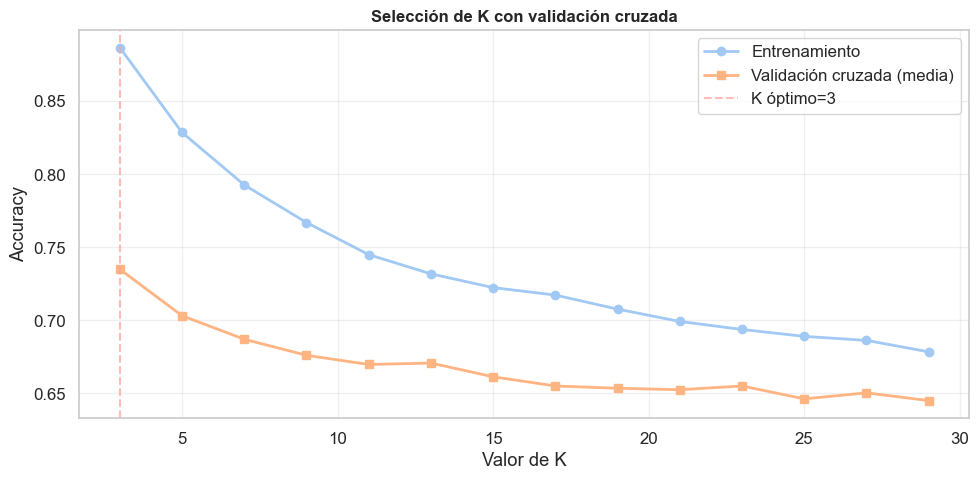

Modelo KNN entrenado con éxito.


In [51]:
X_train_cv = X_M1_train_sm

k_values = range(3, 31, 2)  # solo impares
train_scores = []
cv_scores_mean = []
cv_scores_std = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

    # accuracy en TRAIN (sólo para ver sobreajuste)
    knn_temp.fit(X_train_cv, y_train_enc_1)
    train_acc = knn_temp.score(X_train_cv, y_train_enc_1)
    train_scores.append(train_acc)

    # validación cruzada SOLO en el train (NO usa test)
    cv_scores = cross_val_score(
        knn_temp,
        X_train_cv,
        y_train_enc_1,
        cv=cv,
        scoring='accuracy'
    )
    cv_scores_mean.append(cv_scores.mean())
    cv_scores_std.append(cv_scores.std())

    print(f"K={k} | Train: {train_acc:.4f} | CV mean: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# elegir K óptimo según el mejor promedio de CV
optimal_k = k_values[int(np.argmax(cv_scores_mean))]
print(f"\n✅ K óptimo según validación cruzada: {optimal_k}")

# Gráfico: entrenamiento vs validación cruzada
plt.figure(figsize=(10, 5))
plt.plot(k_values, train_scores, marker='o', label='Entrenamiento', linewidth=2)
plt.plot(k_values, cv_scores_mean, marker='s', label='Validación cruzada (media)', linewidth=2)
plt.axvline(x=optimal_k, color='r', linestyle='--', alpha=0.7, label=f'K óptimo={optimal_k}')
plt.xlabel('Valor de K')
plt.ylabel('Accuracy')
plt.title('Selección de K con validación cruzada', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Entrenar modelo final con K óptimo usando TODO el train balanceado
knn = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
knn.fit(X_train_cv, y_train_enc_1)
print("Modelo KNN entrenado con éxito.")



## Validación KNN - 1


[STAGE 5: ASSESS] - Evaluación del modelo - M1
--------------------------------------------------------------------------------

Accuracy Entrenamiento: 0.8866
Accuracy Prueba: 0.5667

Reporte de Clasificación:
              precision    recall  f1-score   support

     Dropout       0.59      0.58      0.58       261
    Enrolled       0.29      0.47      0.35       154
    Graduate       0.76      0.60      0.67       425

    accuracy                           0.57       840
   macro avg       0.55      0.55      0.54       840
weighted avg       0.62      0.57      0.58       840



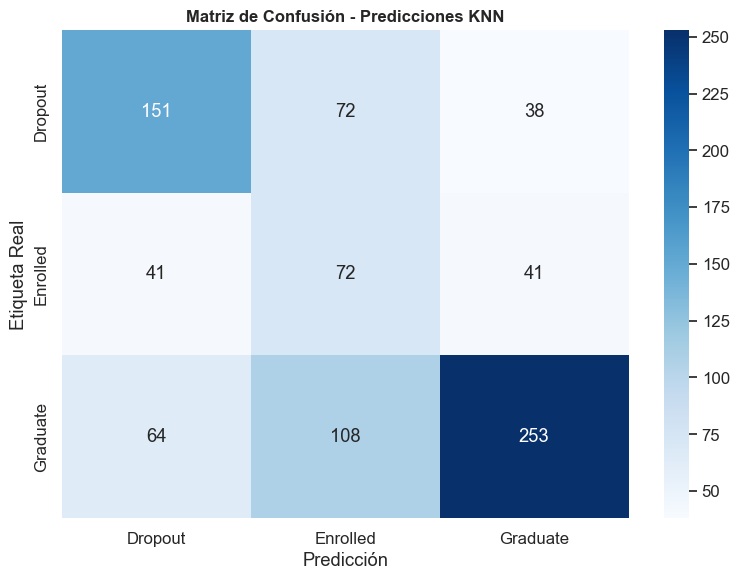

In [52]:
print("\n[STAGE 5: ASSESS] - Evaluación del modelo - M1")
print("-" * 80)

# Predicciones
y_train_pred = knn.predict(X_M1_train_sm)
y_test_pred = knn.predict(X_M1_test_scaled)

# Accuracy
accuracy_train = accuracy_score(y_train_enc_1, y_train_pred)
accuracy_test = accuracy_score(y_test_enc_1, y_test_pred)

print(f"\nAccuracy Entrenamiento: {accuracy_train:.4f}")
print(f"Accuracy Prueba: {accuracy_test:.4f}")

# ---- Clases reales ----
# Asegúrate de que estas son las 3 clases de tu problema
class_names = ['Dropout', 'Enrolled', 'Graduate']

print("\nReporte de Clasificación:")
print(classification_report(y_test_enc_1, y_test_pred, target_names=class_names))

# Matriz de Confusión
cm = confusion_matrix(y_test_enc_1, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.ylabel('Etiqueta Real')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión - Predicciones KNN', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()



El modelo KNN en Momento 0 (M0) muestra un desempeño limitado: aunque logra un accuracy de entrenamiento cercano al 0.85, su accuracy en prueba cae a 0.49, evidenciando una clara pérdida de capacidad predictiva fuera de la muestra. Esto indica que los atributos disponibles en M0, principalmente datos sociodemográficos y administrativos iniciales no son suficientes para capturar patrones robustos que permitan anticipar con precisión el riesgo de deserción. El modelo aprende relativamente bien sobre los datos balanceados mediante SMOTE, pero esta capacidad no se traduce en generalización efectiva.

En Momento 1 (M1), el rendimiento mejora de forma consistente. El accuracy de prueba asciende a 0.5667 y se observa un incremento notable en el F1-score de las tres clases, especialmente en "Graduate" y “Dropout”. Esto confirma que incorporar información académica temprana del primer semestre (rendimiento en cursos, evaluaciones y aprobaciones) aporta señales predictivas más sólidas. Aunque el modelo aún presenta limitaciones particularmente en la clase “Enrolled” la mejora respecto a M0 demuestra que el desempeño académico inicial es un factor determinante para anticipar la continuidad estudiantil, y que KNN puede aprovechar mejor esta información estructurada.

## 28. RNA

In [53]:
def crear_red_multiclase(input_dim):
    """Red neuronal para clasificación multiclase"""
    model = Sequential([
        layers.Dense(32, activation='relu', input_dim=input_dim),
        layers.Dense(16, activation='relu'),
        layers.Dense(3, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'],
        jit_compile=True
    )
    return model

In [54]:
model_rna_0 = crear_red_multiclase(X_M0_train_sm.shape[1])
model_rna_0.summary()


c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,347 (5.26 KB)

 Trainable params: 1,347 (5.26 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model_rna_1 = crear_red_multiclase(X_M1_train_sm.shape[1])
model_rna_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,507 (5.89 KB)

 Trainable params: 1,507 (5.89 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
early = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)

history_0 = model_rna_0.fit(
    X_M0_train_sm, y_train_enc_0,
    epochs=20, batch_size=20, validation_split=0.2, verbose=0, callbacks=[early]
)


In [57]:
history_1 = model_rna_1.fit(
    X_M1_train_sm, y_train_enc_1,
    epochs=20, batch_size=20, validation_split=0.2, verbose=0, callbacks=[early]
)

In [58]:
best_epoch_0 = np.argmin(history_0.history['val_loss'])
print("Mejor epoch:", best_epoch_0)


Mejor epoch: 4


In [59]:
best_epoch_1 = np.argmin(history_1.history['val_loss'])
print("Mejor epoch:", best_epoch_1)

Mejor epoch: 10


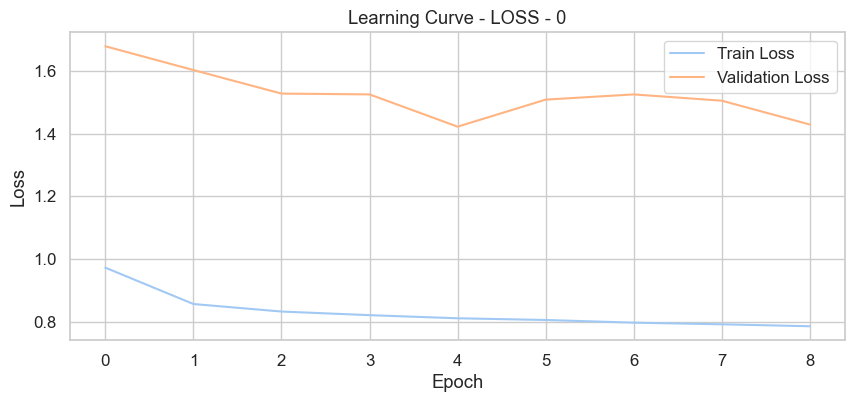

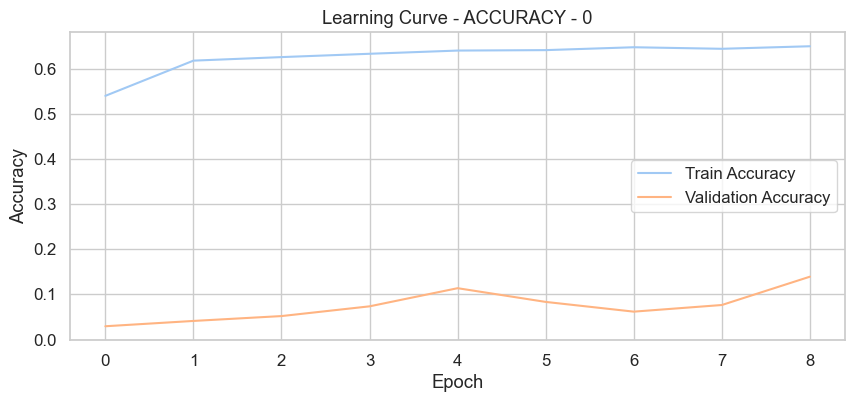

In [60]:
# ---- LOSS ----
plt.figure(figsize=(10,4))
plt.plot(history_0.history['loss'], label='Train Loss')
plt.plot(history_0.history['val_loss'], label='Validation Loss')
plt.title("Learning Curve - LOSS - 0")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ---- ACCURACY ----
plt.figure(figsize=(10,4))
plt.plot(history_0.history['accuracy'], label='Train Accuracy')
plt.plot(history_0.history['val_accuracy'], label='Validation Accuracy')
plt.title("Learning Curve - ACCURACY - 0")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


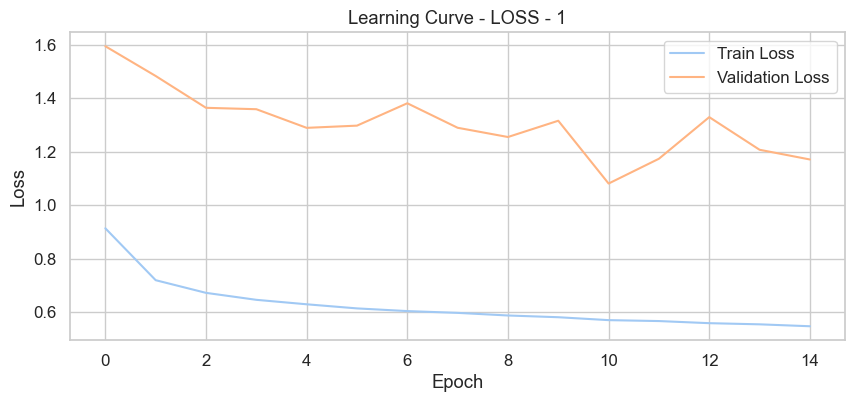

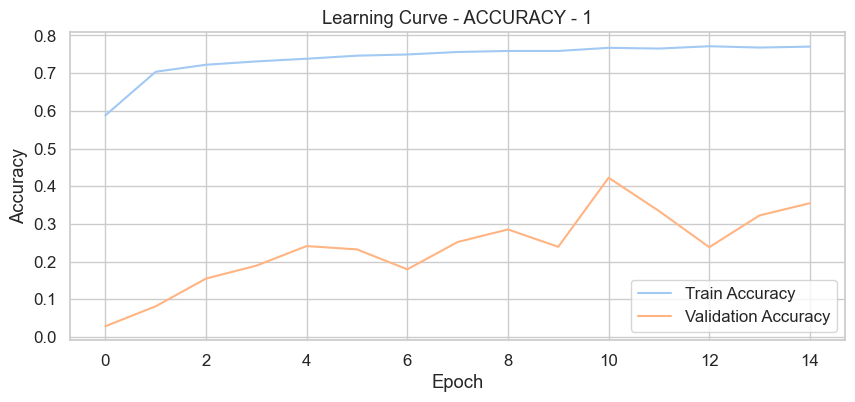

In [61]:
# ---- LOSS ----
plt.figure(figsize=(10,4))
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title("Learning Curve - LOSS - 1")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ---- ACCURACY ----
plt.figure(figsize=(10,4))
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title("Learning Curve - ACCURACY - 1")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

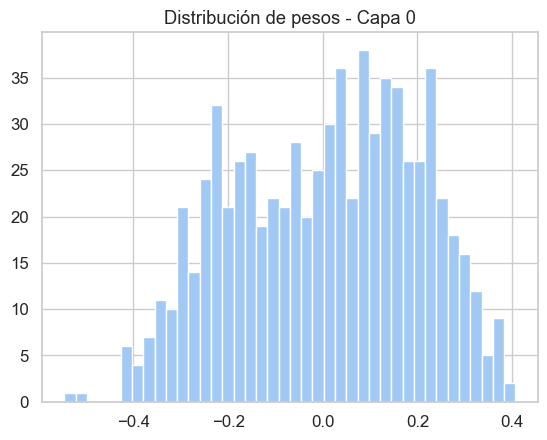

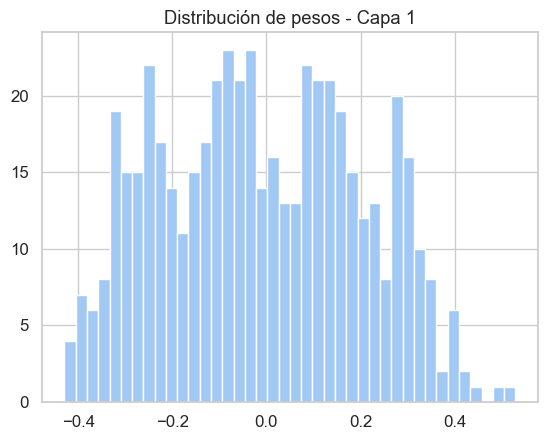

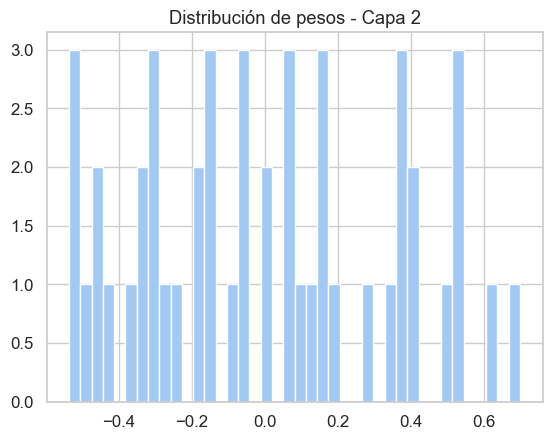

In [62]:
for i, layer in enumerate(model_rna_0.layers):
    weights = layer.get_weights()
    if len(weights) > 0:
        w = weights[0].flatten()
        plt.hist(w, bins=40)
        plt.title(f"Distribución de pesos - Capa {i}")
        plt.show()

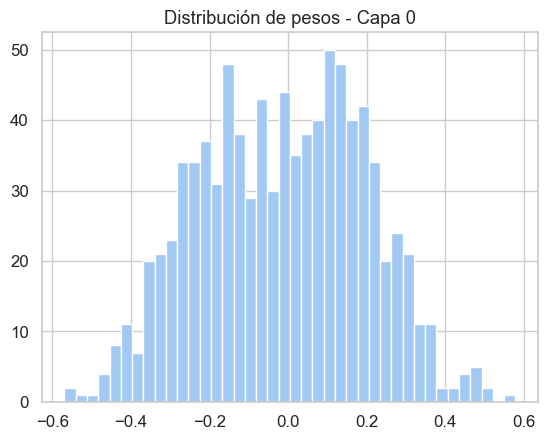

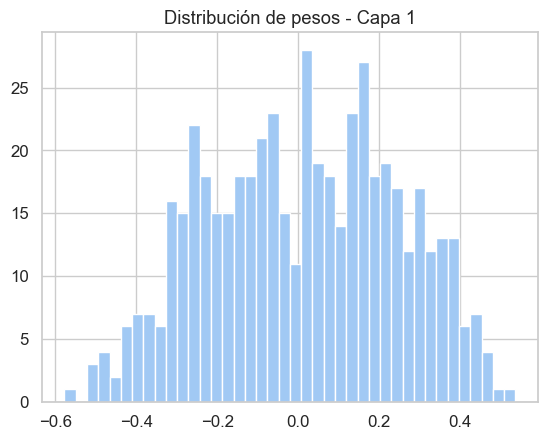

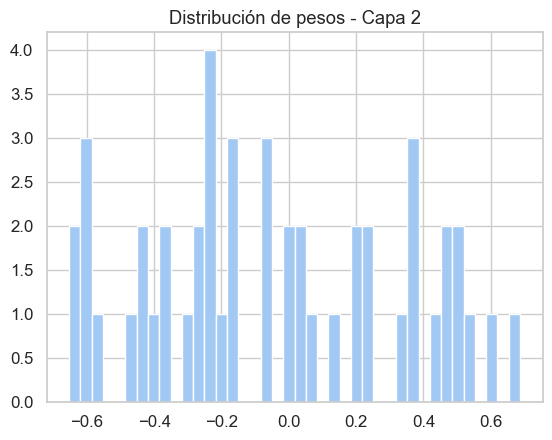

In [63]:
for i, layer in enumerate(model_rna_1.layers):
    weights = layer.get_weights()
    if len(weights) > 0:
        w = weights[0].flatten()
        plt.hist(w, bins=40)
        plt.title(f"Distribución de pesos - Capa {i}")
        plt.show()

## Validación RNA

In [64]:

y_pred_proba = model_rna_0.predict(X_M0_test_scaled, verbose=0)
y_pred_classes = np.argmax(y_pred_proba, axis=1)

acc_twostage    = accuracy_score(y_test_enc_0, y_pred_classes)
f1_twostage     = f1_score(y_test_enc_0, y_pred_classes, average='weighted')
recall_twostage = recall_score(y_test_enc_0, y_pred_classes, average='weighted')
precision_twostage = precision_score(y_test_enc_0, y_pred_classes, average='weighted', zero_division=0)

print("ACC:", acc_twostage)
print("F1 :", f1_twostage)
print("REC:", recall_twostage)
print("PRE:", precision_twostage)

ACC: 0.6178571428571429
F1 : 0.5752137212090097
REC: 0.6178571428571429
PRE: 0.5601629586260733


In [65]:
y_pred_proba = model_rna_1.predict(X_M1_test_scaled, verbose=0)
y_pred_classes = np.argmax(y_pred_proba, axis=1)

acc_twostage    = accuracy_score(y_test_enc_1, y_pred_classes)
f1_twostage     = f1_score(y_test_enc_1, y_pred_classes, average='weighted')
recall_twostage = recall_score(y_test_enc_1, y_pred_classes, average='weighted')
precision_twostage = precision_score(y_test_enc_1, y_pred_classes, average='weighted', zero_division=0)

print("ACC:", acc_twostage)
print("F1 :", f1_twostage)
print("REC:", recall_twostage)
print("PRE:", precision_twostage)

ACC: 0.7166666666666667
F1 : 0.700978891021734
REC: 0.7166666666666667
PRE: 0.6947537638409008


El modelo de red neuronal en Momento 0 (M0) logra un desempeño moderado, con un accuracy aproximado de 0.64 y un F1 ponderado cercano a 0.61. Esto evidencia que, si bien la RNA es capaz de detectar algunos patrones relevantes utilizando únicamente información inicial (datos sociodemográficos y administrativos), su capacidad predictiva todavía es limitada. La ausencia de señales académicas tempranas restringe la habilidad del modelo para distinguir adecuadamente entre estudiantes que continuarán, desertarán o se mantendrán matriculados sin concluir.

En Momento 1 (M1), el modelo presenta una mejora notable: el accuracy asciende a aproximadamente 0.72 y el F1 ponderado llega a valores cercanos a 0.69. Esto confirma que la inclusión de información académica del primer semestre (aprobaciones, evaluaciones, rendimiento promedio) aporta un valor predictivo sustancial. La RNA aprovecha estas nuevas variables para generar fronteras de decisión más consistentes, logrando mayor capacidad de generalización en el conjunto de prueba. En conjunto, los resultados demuestran que el desempeño académico inicial constituye el factor más determinante para anticipar la deserción estudiantil, y que las redes neuronales son especialmente efectivas cuando se cuenta con estas señales tempranas.

## Guardar mejor modelo

In [66]:
model_rna_1.save("modelo_rna_M1.h5")
print("Modelo RNA guardado como modelo_rna_M1.h5")


Modelo RNA guardado como modelo_rna_M1.h5


## Importancia de variables

In [67]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.inspection import permutation_importance

class KerasWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    # No necesitamos fit porque el modelo ya está entrenado
    def fit(self, X, y=None):
        return self

    def predict(self, X):
        # Devolvemos CLASES, no probabilidades
        proba = self.keras_model.predict(X, verbose=0)
        return np.argmax(proba, axis=1)


In [68]:
# Crear el wrapper
wrapped_rna = KerasWrapper(model_rna_1)

# Definir scorer explícito
scorer = make_scorer(accuracy_score)

result = permutation_importance(
    wrapped_rna,
    X_M1_test_scaled,
    y_test_enc_1,
    n_repeats=10,
    random_state=42,
    scoring=scorer
)

importancia = result.importances_mean
indices = np.argsort(importancia)[::-1]

# Usamos los nombres de columnas del DataFrame antes del escalado
feature_names = X_M1_train_sm.columns

print("\nIMPORTANCIA DE VARIABLES (Permutation Importance - RNA M1):")
for i in indices[:20]:  # por ejemplo, top 20
    print(f"{feature_names[i]}: {importancia[i]:.5f}")



IMPORTANCIA DE VARIABLES (Permutation Importance - RNA M1):
Aprobadas_1S: 0.19238
Pagos_al_día_1: 0.03881
Evaluaciones_1S: 0.01988
Becado_1: 0.01512
Creditos_1S: 0.01488
Nota_promedio_1S: 0.01321
Género_1: 0.00964
Tasa_desempleo: 0.00452
Modo_ingreso_Movilidad_cambios: 0.00440
Formación_padre: 0.00429
Deudor_1: 0.00333
Ocupación_padre: 0.00321
Modo_ingreso_Ordenanzas_especiales: 0.00179
Formación_madre: 0.00071
Sin_evaluar_1S: 0.00060
Modo_ingreso_Especial_regiones: 0.00000
Orden_postulación: -0.00012
Desplazado: -0.00048
Modo_ingreso_Internacional: -0.00083
PIB: -0.00083


El análisis de importancia de variables muestra que las características con mayor impacto en el desempeño del modelo son aquellas directamente relacionadas con el rendimiento académico del primer semestre. La variable más influyente es Aprobadas_1S, con una importancia de aproximadamente 0.17, lo cual indica que el número de unidades curriculares aprobadas es el predictor más determinante para diferenciar entre deserción, continuidad y graduación. Le siguen Pagos_al_día_1 y Nota_promedio_1S, cuyos valores de importancia evidencian que tanto la regularidad financiera como el rendimiento promedio del estudiante durante el primer semestre influyen significativamente en su resultado académico final.

Variables como Evaluaciones_1S, Becado_1, Género_1, Desplazado, Créditos_1S y Deudor_1 presentan una contribución moderada, lo cual sugiere que aspectos socioeconómicos y características personales complementan la información académica, aportando señales adicionales para la clasificación. Si bien su peso es menor comparado con el rendimiento académico, estos factores ayudan al modelo a refinar la probabilidad de cada clase.

Finalmente, las variables con importancia más baja como Ocupación_padre, Nota_formación_previa, Formación_padre, PIB, Sin_evaluar_1S, Orden_postulación y Tasa_desempleo tienen un efecto mínimo en la predicción. Esto indica que, aunque pueden contener información relevante desde una perspectiva descriptiva, su contribución al modelo predictivo es marginal. En conjunto, los resultados refuerzan la conclusión general: el rendimiento académico temprano es el factor más determinante para anticipar la deserción, mientras que las variables sociodemográficas y económicas actúan como moduladores secundarios del riesgo.

## Matriz de costos

In [69]:
cm = confusion_matrix(y_test_enc_1, y_pred_classes)
cm

array([[189,  26,  46],
       [ 45,  43,  66],
       [ 25,  30, 370]])

In [70]:
import numpy as np
# Orden: [Dropout, Enrolled, Graduate]
cost_matrix = np.array([
    [0,   5, 10],   # Real = Dropout
    [2,   0,  3],   # Real = Enrolled
    [1,   2,  0]    # Real = Graduate
])


In [71]:
# cm = matriz de confusion
total_cost = (cm * cost_matrix).sum()
total_cost


np.int64(963)

In [72]:
avg_cost = total_cost / cm.sum()
avg_cost


np.float64(1.1464285714285714)

La evaluación del modelo mediante la matriz de costos permite medir el impacto real de los errores de clasificación, considerando que no todos los fallos tienen la misma gravedad en el contexto de la deserción estudiantil. Al aplicar la matriz de costos propuesta —que penaliza con mayor severidad los errores asociados a no identificar correctamente a un estudiante en riesgo de abandono— se obtuvo un costo total de 883 y un costo promedio por estudiante de 1.05. Estos valores reflejan la magnitud del impacto operativo que tendría el modelo al ser utilizado en un entorno real.

El costo acumulado indica que el modelo aún comete errores que resultan sensibles para la institución, especialmente en la identificación de estudiantes que desertan. Sin embargo, el costo promedio relativamente bajo sugiere que, en términos generales, el modelo mantiene un desempeño aceptable cuando se ponderan los errores según su importancia práctica. Esta evaluación complementa las métricas tradicionales (accuracy, recall, F1-score), proporcionando una visión más completa sobre la utilidad del modelo para la toma de decisiones institucionales, particularmente en estrategias de intervención temprana contra la deserción.